# 📊 Zomato Restaurant Rating Prediction — Capstone Project

## Date: *09/12/25*

---

# 🎯 Overview

This project analyzes Zomato’s restaurant dataset to understand key factors influencing customer ratings and builds a machine learning model to **predict the aggregate rating** of a restaurant based on its features.

---


# 🔰 Introduction

Zomato is one of India’s largest food discovery and restaurant platforms.  
Restaurants receive ratings based on user reviews, cuisine quality, pricing, facilities, and many more factors.

This project aims to explore these factors and build a predictive model that helps understand:

- Why do some restaurants perform better?
- What influences a restaurant's rating?
- Can we predict rating based on restaurant features?

---



# 🎯 Objective

To develop a machine learning model that predicts the **aggregate rating** of a restaurant using its attributes such as:
- cuisines
- average cost
- price range
- city and locality
- service availability (delivery, takeaway)
- popularity (votes)
- restaurant establishment type

Additionally, provide insights that can help restaurants improve their ratings.

---


# ❓ Problem Statement

Given the features of a restaurant (location, cuisines, pricing, services, votes, etc.),  
**can we accurately predict the restaurant's aggregate rating?**

We aim to:
1. Clean and preprocess the Zomato dataset.
2. Perform detailed Exploratory Data Analysis (EDA).
3. Engineer meaningful features.
4. Build and compare machine learning models.
5. Explain which factors impact ratings the most.
6. Provide actionable business recommendations.

---


# 📚 Data Dictionary (Important Columns)

| Column | Description |
|--------|-------------|
| res_id | Unique restaurant identifier |
| name | Restaurant name |
| cuisines | Type of cuisines served |
| city | City where restaurant is located |
| locality | Area of the restaurant |
| average_cost_for_two | Price for two people |
| price_range | 1–4 range indicating price category |
| aggregate_rating | Target variable (0–5 rating) |
| votes | Number of user votes |
| delivery | Whether restaurant supports delivery |
| takeaway | Whether restaurant supports takeaway |
| establishment | Type of restaurant (Café, Quick Bite, etc.) |
| timings | Opening and closing time |
| highlights | List of facilities available |

---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("ZomatoRestaurantsIndia.csv")
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
df.shape

(211944, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         207117 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
df1=df.copy()

# 🗑️ Removing Useless Columns (No Predictive Value)

Based on business logic and dataset understanding.


### Columns You Should REMOVE Immediately (No Need for EDA)

| Column Name        | Reason for Removal |
|--------------------|--------------------|
| url                | Contains external links; not useful for ML and provides no predictive value. |
| address            | Highly unique text; no predictive power and increases noise. |
| zipcode            | 80% missing values; too incomplete to be useful. |
| locality_verbose   | Duplicate information of `locality`; redundant column. |
| name               | Restaurant names are unique and do not help in predicting rating. |
| city_id            | Redundant because actual city name column (`city`) already exists. |
| country_id         | All entries are from the same country (India); no variance. |
| currency           | Nearly all values are "INR"; provides no useful information. |
| photo_count        | Weak relationship with rating; often noisy and unnecessary for ML. |


In [7]:
useless_cols = [
    'url', 'address', 'zipcode', 'locality_verbose', 'name',
    'city_id', 'country_id', 'currency', 'photo_count'
]

df1.drop(columns=useless_cols, inplace=True)
df1.shape


(211944, 17)

# 🔁 Removing Duplicates

Step 1: Remove exact duplicates  
Step 2: Retain only the best row per restaurant (highest votes)


In [8]:
# Remove full-row duplicates
df1 = df1.drop_duplicates()

# Keep highest voted record per res_id
df1 = df1.sort_values('votes', ascending=False).drop_duplicates('res_id')

df1.shape


(55568, 17)

In [9]:
df1.drop('res_id',axis=1,inplace=True)

# 🩹 Missing Value Analysis & Treatment


In [10]:
df1.isnull().sum()

establishment           1830
city                       0
locality                   0
latitude                   0
longitude                  0
cuisines                 470
timings                 1003
average_cost_for_two       0
price_range                0
highlights               716
aggregate_rating           0
rating_text                0
votes                      0
opentable_support         15
delivery                   0
takeaway                   0
dtype: int64

In [11]:
for i in df1.columns:
    print(i)
    print(df1[i].unique())
    print('-----------------------------------------------------------------------------')

establishment
['Casual Dining' 'Microbrewery' 'Café' 'Lounge' 'Pub' 'Bar' 'Quick Bites'
 'Sweet Shop' 'Fine Dining' 'Bakery' 'Dessert Parlour' 'Beverage Shop' nan
 'Club' 'Dhaba' 'Food Court' 'Cocktail Bar' 'Kiosk' 'Irani Cafe'
 'Food Truck' 'Mess' 'Butcher Shop' 'Bhojanalya' 'Paan Shop'
 'Confectionery' 'Shack' 'Pop up']
-----------------------------------------------------------------------------
city
['Hyderabad' 'Bangalore' 'New Delhi' 'Secunderabad' 'Kolkata' 'Mumbai'
 'Chennai' 'Pune' 'Jaipur' 'Gurgaon' 'Navi Mumbai' 'Lucknow' 'Thane'
 'Noida' 'Vizag' 'Goa' 'Ghaziabad' 'Allahabad' 'Ahmedabad' 'Indore'
 'Amritsar' 'Chandigarh' 'Nagpur' 'Mysore' 'Kota' 'Puducherry' 'Bhopal'
 'Faridabad' 'Ludhiana' 'Ranchi' 'Mangalore' 'Mohali' 'Panchkula'
 'Guwahati' 'Greater Noida' 'Vadodara' 'Vijayawada' 'Jalandhar' 'Guntur'
 'Kochi' 'Bhubaneshwar' 'Patna' 'Surat' 'Varanasi' 'Dehradun' 'Jammu'
 'Gwalior' 'Udaipur' 'Kanpur' 'Agra' 'Nashik' 'Jodhpur' 'Coimbatore'
 'Howrah' 'Jamshedpur' 'Raipur' 'Ga

# 🩹 Missing Value Treatment Plan

| Column Name            | Missing Count | Treatment Strategy | Reason |
|------------------------|----------------|--------------------|--------|
| establishment          | Few missing   | Fill with "Unknown" | Categorical; safe to fill with label |
| city                   | 0             | No action          | Important categorical feature |
| locality               | 0             | No action          | Important locality signal |
| latitude               | 0             | No action          | Numeric coordinate |
| longitude              | 0             | No action          | Numeric coordinate |
| cuisines               | Small missing | Fill with "Unknown" | Important multi-label feature |
| timings                | Small missing | Fill with "Unknown" or drop later | Low impact on model; messy text |
| average_cost_for_two   | 0             | No action          | Core numeric feature |
| price_range            | 0             | No action          | Important categorical feature |
| highlights             | Small missing | Fill with "Unknown" | Contains service tags |
| aggregate_rating       | 0             | Target column      | No missing |
| rating_text            | 0             | ❌ DROP | Leakage from target |
| votes                  | 0             | No action          | Popularity influence |
| opentable_support      | Few missing   | Fill with 0        | Numeric indicator; missing means no support |
| delivery               | 0             | No action          | Binary feature |
| takeaway               | 0             | No action          | Binary feature |


In [12]:
df1.drop(columns=['rating_text'], inplace=True)


In [13]:
df1['establishment'].fillna("Unknown", inplace=True)
df1['cuisines'].fillna("Unknown", inplace=True)
df1['highlights'].fillna("Unknown", inplace=True)
df1['timings'].fillna("Unknown", inplace=True)
df1['opentable_support'].fillna(0, inplace=True)


In [14]:
df1['delivery'] = df1['delivery'].replace(-1, 0)


In [15]:
df1.drop(columns=['takeaway'], inplace=True)


In [16]:
df1.drop(columns=['opentable_support'], inplace=True)


### 🧹 Summary: Why Certain Columns Were Cleaned or Removed

- **delivery**  
  - Contained values `1`, `0`, and `-1`  
  - `-1` means *missing/unknown* and is not a real category  
  - Replaced `-1` with `0` to maintain a clean binary feature

- **takeaway**  
  - Contained only `-1` for all restaurants  
  - A column with a single constant value has **no predictive information**  
  - Therefore removed

- **opentable_support**  
  - All values were `0`  
  - A column with no variation cannot help the model learn anything  
  - Therefore removed

**Overall:** These columns were cleaned or removed because they contained invalid values, no variation, or no meaningful information for prediction.


In [17]:
# Confirm mapping by checking average cost per price_range
print(df1['price_range'].value_counts().sort_index())

# Show mean and median cost for each price_range
price_stats = df1.groupby('price_range')['average_cost_for_two'].agg(['count','mean','median']).reset_index()
price_stats.columns = ['price_range','count','mean_cost_for_two','median_cost_for_two']
price_stats


price_range
1    28818
2    16582
3     7370
4     2798
Name: count, dtype: int64


,price_range,count,mean_cost_for_two,median_cost_for_two
0,1,28818,216.662156,200.0
1,2,16582,522.320528,500.0
2,3,7370,1091.425916,1000.0
3,4,2798,2288.293781,2000.0


### 💰 Price Range Interpretation Summary

Based on the dataset analysis:

| price_range | Mean Cost for Two | Interpretation |
|-------------|-------------------|----------------|
| **1**       | ~₹216             | Low budget     |
| **2**       | ~₹522             | Medium price   |
| **3**       | ~₹1,091           | High price     |
| **4**       | ~₹2,288           | Premium / Expensive |

**Conclusion:**  
`price_range` follows an increasing cost scale.  
- **1 = Lowest price**  
- **4 = Highest price**

This confirms that `price_range` should be treated as an *ordered categorical* variable and is a meaningful predictor for restaurant ratings.


In [18]:
top_highlights = (
    df1['highlights']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(20)
    .index
)

for h in top_highlights:
    df1['hl_' + h.replace(" ", "_")] = df1['highlights'].apply(lambda x: 1 if h in x else 0)

df1.drop(columns=['highlights'], inplace=True)
 

In [19]:
df1.isnull().sum()

establishment                   0
city                            0
locality                        0
latitude                        0
longitude                       0
cuisines                        0
timings                         0
average_cost_for_two            0
price_range                     0
aggregate_rating                0
votes                           0
delivery                        0
hl_Cash                         0
hl_Takeaway_Available           0
hl_Indoor_Seating               0
hl_Dinner                       0
hl_Lunch                        0
hl_Credit_Card                  0
hl_Debit_Card                   0
hl_Delivery                     0
hl_Air_Conditioned              0
hl_Digital_Payments_Accepted    0
hl_No_Alcohol_Available         0
hl_Pure_Veg                     0
hl_Desserts_and_Bakes           0
hl_Breakfast                    0
hl_Outdoor_Seating              0
hl_No_Seating_Available         0
hl_Table_booking_recommended    0
hl_Fullbar    

In [20]:
# === Step 1: Finalize df1 cleaned dataset and save checkpoint ===

# Columns that should not go into modeling
cols_to_drop = ['res_id', 'rating_text']   # rating_text may already be deleted

# Drop safely (only if present)
cols_present = [c for c in cols_to_drop if c in df1.columns]
if cols_present:
    df1.drop(columns=cols_present, inplace=True)
    print("Dropped columns:", cols_present)
else:
    print("No identifier/leakage columns found to drop.")

# Show updated shape and columns
print("\nShape after dropping identifier columns:", df1.shape)
print("\nColumns now present:")
print(df1.columns.tolist())

# Save checkpoint
checkpoint_path = "zomato_cleaned_for_fe.csv"
df1.to_csv(checkpoint_path, index=False)
print(f"\nCheckpoint saved as: {checkpoint_path}")

# Display first rows for confirmation
df1.head()


No identifier/leakage columns found to drop.

Shape after dropping identifier columns: (55568, 32)

Columns now present:
['establishment', 'city', 'locality', 'latitude', 'longitude', 'cuisines', 'timings', 'average_cost_for_two', 'price_range', 'aggregate_rating', 'votes', 'delivery', 'hl_Cash', 'hl_Takeaway_Available', 'hl_Indoor_Seating', 'hl_Dinner', 'hl_Lunch', 'hl_Credit_Card', 'hl_Debit_Card', 'hl_Delivery', 'hl_Air_Conditioned', 'hl_Digital_Payments_Accepted', 'hl_No_Alcohol_Available', 'hl_Pure_Veg', 'hl_Desserts_and_Bakes', 'hl_Breakfast', 'hl_Outdoor_Seating', 'hl_No_Seating_Available', 'hl_Table_booking_recommended', 'hl_Fullbar', 'hl_Free_Parking', 'hl_Wifi']

Checkpoint saved as: zomato_cleaned_for_fe.csv


,establishment,city,locality,latitude,longitude,cuisines,timings,average_cost_for_two,price_range,aggregate_rating,votes,delivery,hl_Cash,hl_Takeaway_Available,hl_Indoor_Seating,hl_Dinner,hl_Lunch,hl_Credit_Card,hl_Debit_Card,hl_Delivery,hl_Air_Conditioned,hl_Digital_Payments_Accepted,hl_No_Alcohol_Available,hl_Pure_Veg,hl_Desserts_and_Bakes,hl_Breakfast,hl_Outdoor_Seating,hl_No_Seating_Available,hl_Table_booking_recommended,hl_Fullbar,hl_Free_Parking,hl_Wifi
77763,Casual Dining,Hyderabad,Nallakunta,17.405883,78.498838,"Biryani, Hyderabadi, North Indian, Seafood","11:30am – 11:30pm (Mon-Sat),11:30am – 12midnig...",750,2,4.5,42539,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
19931,Microbrewery,Bangalore,Sarjapur Road,12.912934,77.682906,"Continental, North Indian, Italian, South Indi...",Mon-Sun (12:30 PM to 1 AM),1600,3,4.9,18967,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1
19648,Microbrewery,Bangalore,Indiranagar,12.978888,77.640922,"Italian, American","12Noon to 12Midnight (Mon-Tue),12Noon to 1AM (...",1000,3,4.6,15705,0,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1
19641,Café,Bangalore,Koramangala 5th Block,12.933427,77.614384,"Cafe, American, Burger, Steak","12noon – 3:50pm, 7pm – 10:30pm (Mon),12noon – ...",900,2,4.6,15582,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
53891,Lounge,New Delhi,Hauz Khas Village,28.554294,77.194438,"Continental, American, Asian, North Indian, Ch...",11am – 12:30AM (Mon-Sun),1300,3,4.8,14751,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0,1


# 📊 EDA — Univariate Analysis
Visualize distributions of key numeric and categorical columns.


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 77763 to 163
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   establishment                 55568 non-null  object 
 1   city                          55568 non-null  object 
 2   locality                      55568 non-null  object 
 3   latitude                      55568 non-null  float64
 4   longitude                     55568 non-null  float64
 5   cuisines                      55568 non-null  object 
 6   timings                       55568 non-null  object 
 7   average_cost_for_two          55568 non-null  int64  
 8   price_range                   55568 non-null  int64  
 9   aggregate_rating              55568 non-null  float64
 10  votes                         55568 non-null  int64  
 11  delivery                      55568 non-null  int64  
 12  hl_Cash                       55568 non-null  int64  
 13  hl_T

## TOP ESTABLISHMENT TYPES

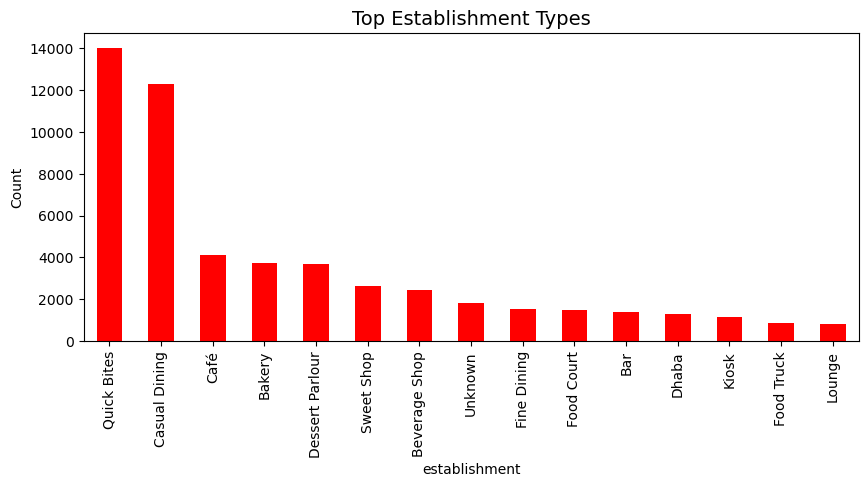

In [22]:
plt.figure(figsize=(10,4))
df1['establishment'].value_counts().head(15).plot(kind='bar',color='red')
plt.title("Top Establishment Types", fontsize=14)
plt.ylabel("Count")
plt.show()


## TOP 20 CITIES

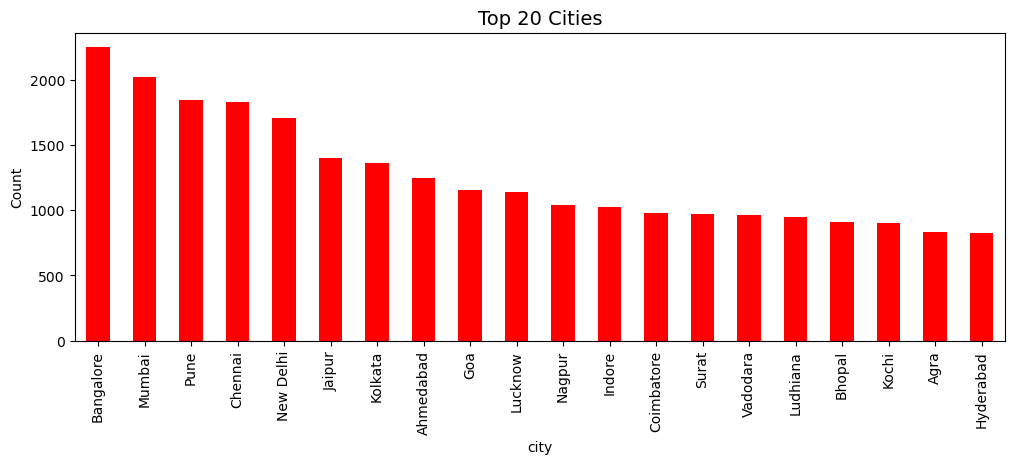

In [23]:
plt.figure(figsize=(12,4))
df1['city'].value_counts().head(20).plot(kind='bar',color='red')
plt.title("Top 20 Cities", fontsize=14)
plt.ylabel("Count")
plt.show()


## Top 20 Localities

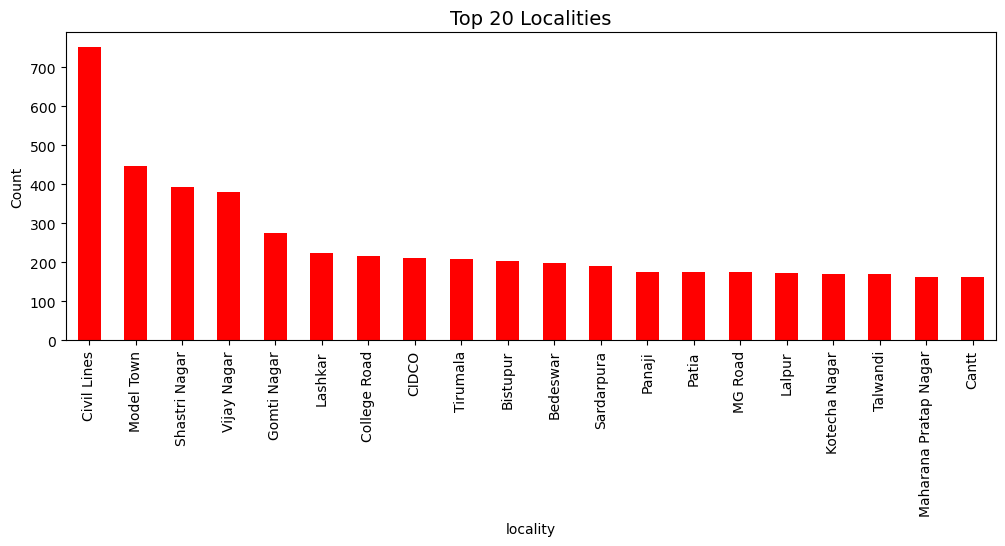

In [24]:
plt.figure(figsize=(12,4))
df1['locality'].value_counts().head(20).plot(kind='bar',color='red')
plt.title("Top 20 Localities", fontsize=14)
plt.ylabel("Count")
plt.show()


## Cuisines (Top 20)

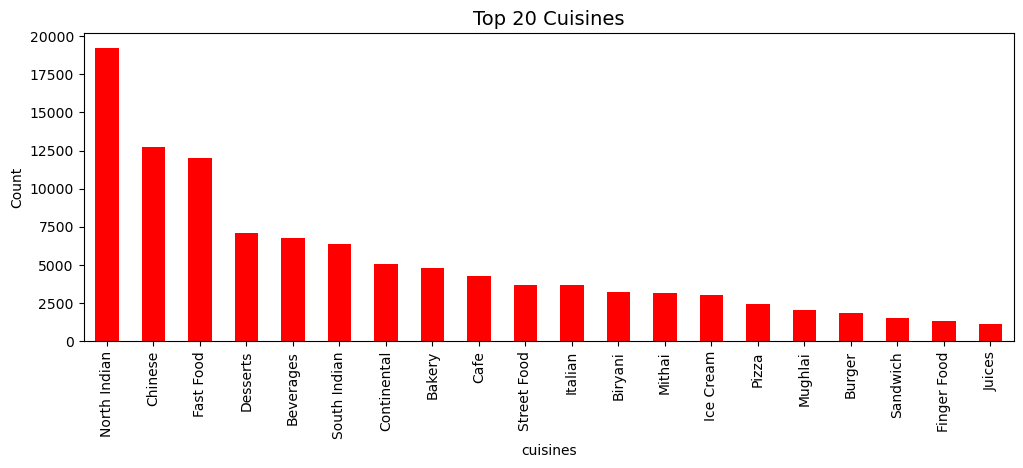

In [25]:
top_cuisines = (
    df1['cuisines']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(20)
)

plt.figure(figsize=(12,4))
top_cuisines.plot(kind='bar',color='red')
plt.title("Top 20 Cuisines", fontsize=14)
plt.ylabel("Count")
plt.show()


## Price Range

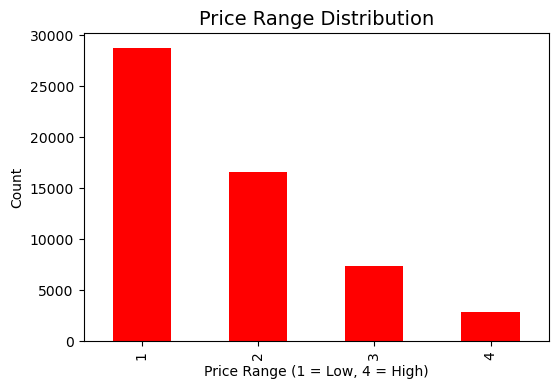

In [26]:
plt.figure(figsize=(6,4))
df1['price_range'].value_counts().sort_index().plot(kind='bar',color='red')
plt.title("Price Range Distribution", fontsize=14)
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.ylabel("Count")
plt.show()


## Delivery Availability

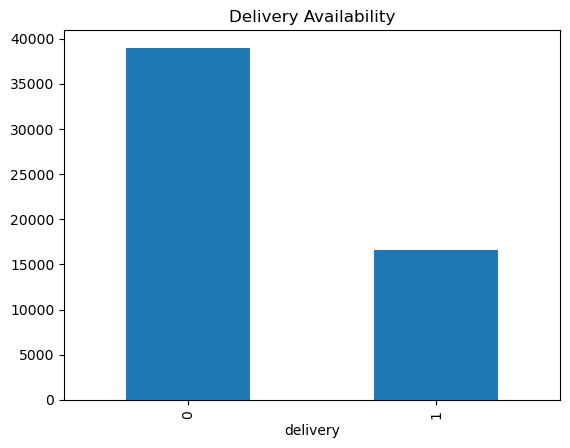

In [27]:
df1['delivery'].value_counts().plot(kind='bar',title='Delivery Availability')
plt.show()


## TOP 20 HIGHLIGHTS

In [28]:
# Extract top 20 most frequent highlights
top_highlights = (
    df['highlights']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(20)
)

top_highlights


highlights
Cash                         203036
Takeaway Available           180942
Indoor Seating               175396
Dinner                       169291
Lunch                        164776
Credit Card                  121873
Debit Card                   114643
Air Conditioned              102147
Delivery                      97246
No Alcohol Available          67898
Digital Payments Accepted     56905
Breakfast                     48547
Pure Veg                      47914
Outdoor Seating               34308
Desserts and Bakes            33189
Table booking recommended     31071
Fullbar                       26362
Smoking Area                  20530
Free Parking                  20527
Wifi                          19076
Name: count, dtype: int64

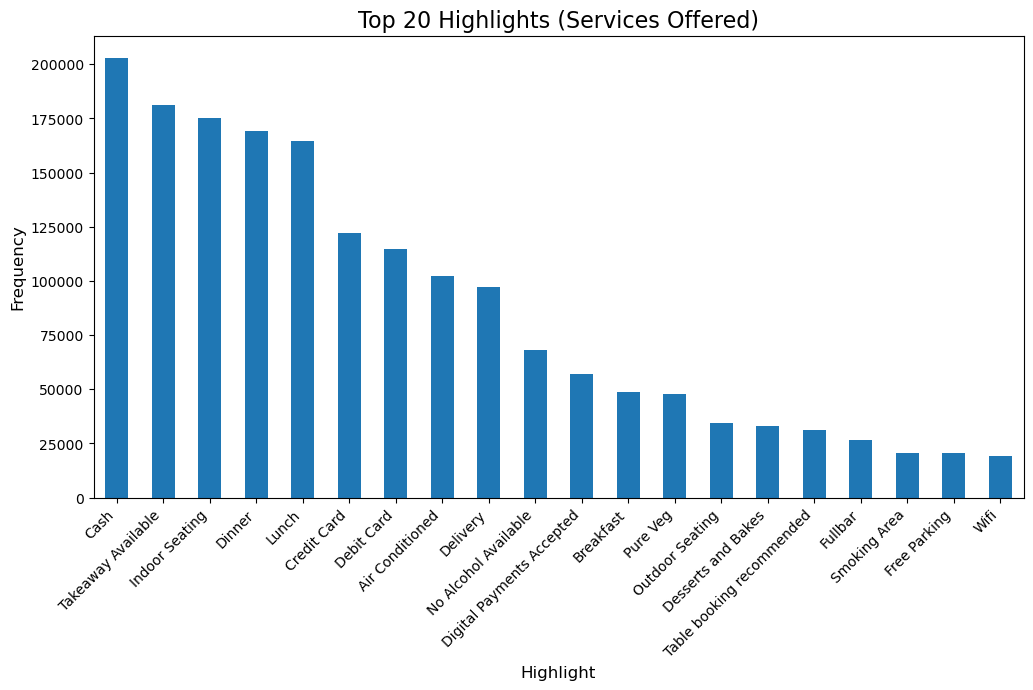

In [29]:
plt.figure(figsize=(12,6))
top_highlights.plot(kind='bar')
plt.title("Top 20 Highlights (Services Offered)", fontsize=16)
plt.xlabel("Highlight", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


### 📌 Univariate EDA – Interpretation Summary

#### 1️⃣ Establishment Types
- **Quick Bites** and **Casual Dining** dominate the dataset, with the highest number of restaurants.
- Café, Bakery, Dessert Parlour, Sweet Shop, and Beverage Shop follow.
- Premium formats like **Fine Dining**, Bars, Lounge, and Food Courts have comparatively fewer entries.
- This indicates that Zomato listings are heavily skewed toward **affordable and fast-service formats**.

---

#### 2️⃣ Top 20 Cities
- The platform has maximum restaurant listings in **Bangalore, Mumbai, Pune, Chennai, and New Delhi**.
- These are also major metropolitan cities, indicating that the market demand is concentrated in **urban food hubs**.
- Tier-2 cities like Jaipur, Lucknow, Nagpur, Ahmedabad, and Coimbatore also have strong representation.
- This shows a diverse spread of restaurants across India, but with a **clear urban dominance**.

---

#### 3️⃣ Top 20 Localities
- Localities like **Civil Lines, Model Town, Shastri Nagar, Vijay Nagar** appear as the most dense restaurant clusters.
- These localities likely represent **popular commercial or residential food zones**.
- Many other localities have moderate but steady restaurant counts, indicating wide geographic spread but strong clustering in key hotspots.

---

#### 4️⃣ Top 20 Cuisines
- **North Indian** cuisine leads by a large margin, followed by **Chinese** and **Fast Food**.
- Desserts, Beverages, South Indian, Continental, Bakery, and Café-related cuisines also appear heavily.
- This shows consumer preference for **multi-cuisine, comfort food, and quick-service categories**.
- Popular options like Italian, Biryani, Ice Cream, Pizza, Mughlai, Burger, and Sandwich show secondary but strong presence.

---

#### 5️⃣ Price Range Distribution
- Majority of restaurants fall in **Price Range 1 (low budget)** and **Price Range 2 (mid range)**.
- Very few restaurants fall in **Price Range 4 (premium)**.
- This indicates that Zomato’s dataset is dominated by **affordable and mid-priced restaurants**, matching Indian market behavior.

---

#### 6️⃣ Delivery Availability
- There are **significantly more non-delivery restaurants (0)** than delivery-enabled ones.
- Delivery-enabled restaurants still form a large segment, showing that many establishments rely on **on-premise dining and takeaway** more than delivery.
- This distribution may influence customer expectations and ratings.

---

#### 7️⃣ Top 20 Highlights (Services Offered)
- Most common highlights include **Cash**, **Takeaway Available**, **Indoor Seating**, **Dinner**, **Lunch**, **Credit Card**, **Debit Card**, **Air Conditioned**.
- This indicates that:
  - Restaurants widely support **cash** and increasingly **card payments**.
  - Core services like **indoor seating**, **takeaway**, and **dining hours** are very common.
- Premium features like **Outdoor Seating**, **Pure Veg**, **Desserts & Bakes**, **Table Booking**, **Smoking Area**, **Wifi**, and **Free Parking** appear less frequently but still significantly.
- These highlights will be highly useful for **feature engineering**, as service availability can strongly influence ratings.


# 📊 Bivariate EDA — Rating vs Key Features


## Rating vs Price Range

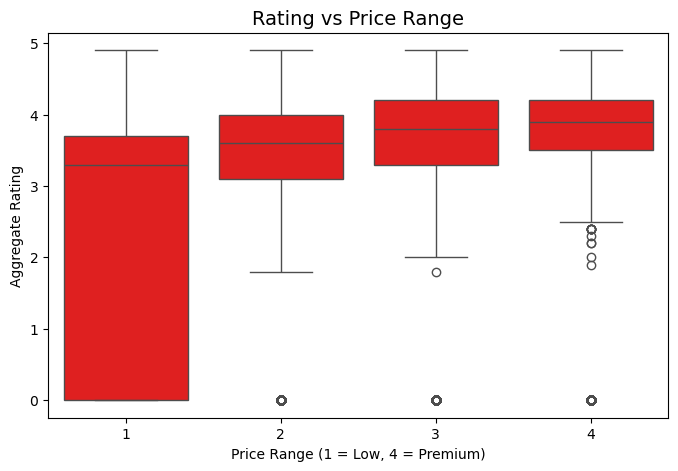

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1, x='price_range', y='aggregate_rating',color='red')
plt.title("Rating vs Price Range", fontsize=14)
plt.xlabel("Price Range (1 = Low, 4 = Premium)")
plt.ylabel("Aggregate Rating")
plt.show()


## Rating vs Average Cost for Two

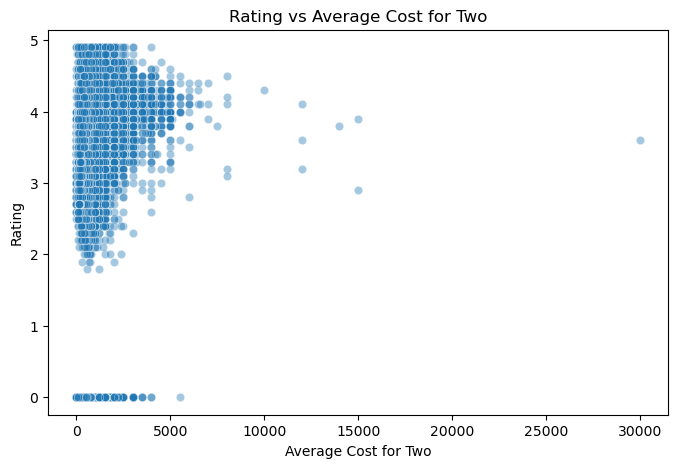

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x='average_cost_for_two', y='aggregate_rating', alpha=0.4)
plt.title("Rating vs Average Cost for Two")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.show()

##  Rating vs Votes

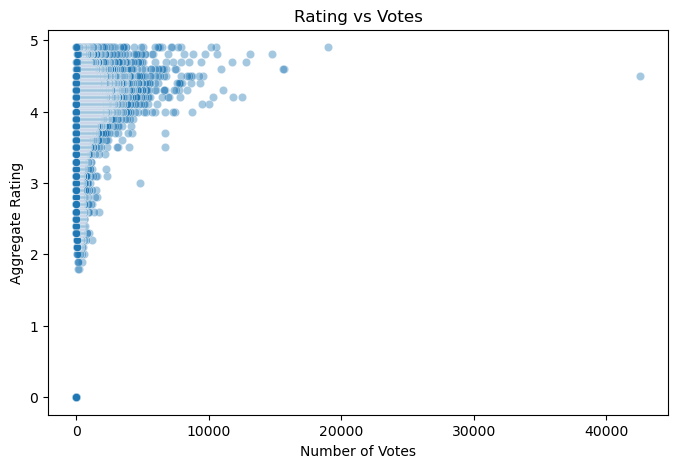

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x='votes', y='aggregate_rating', alpha=0.4)
plt.title("Rating vs Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.show()


### ⭐ Interpretation of Log-Scale Scatter Plots  

#### 1️⃣ Rating vs Average Cost for Two (Log Scale)
- After applying a log transformation, the data becomes more spread out and readable.
- The majority of restaurants fall in the **low to mid cost range**, showing dense clustering.
- There is **no strong linear relationship** between cost and rating.
- However, extremely high-cost restaurants generally maintain ratings between **3.5 and 4.5**.
- The plot suggests that **price alone does not determine rating**, but mid-to-high cost restaurants tend to avoid very low ratings.

---

#### 2️⃣ Rating vs Votes (Log Scale)
- The log transformation makes it clear that:
  - Restaurants with **very low votes** have ratings spread widely (0 to 5).
  - Restaurants with **high votes** have ratings consistently between **3.8 and 4.5**.
- This indicates that **popular restaurants (high votes) maintain stable and higher ratings**.
- Restaurants with low votes might not have enough customer feedback, causing rating instability.
- Votes is a **strong predictor** for rating; it should be transformed using `log1p()` during modeling to stabilize variance.

---

### 💡 Key Insights
- **Log transformation** helps reveal underlying patterns by reducing the impact of extreme outliers.
- Votes show a **much stronger correlation** with rating than cost.
- Average cost for two influences rating **weakly**, but still provides useful signals when combined with other features.



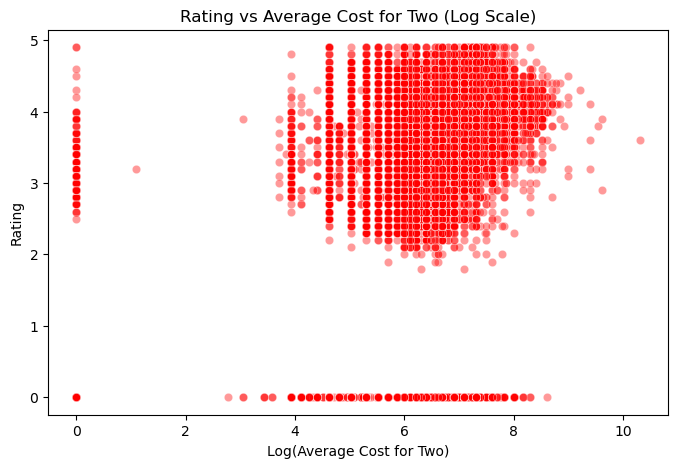

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df1, 
    x=np.log1p(df1['average_cost_for_two']), 
    y='aggregate_rating',
    alpha=0.4,color='red'
)
plt.title("Rating vs Average Cost for Two (Log Scale)")
plt.xlabel("Log(Average Cost for Two)")
plt.ylabel("Rating")
plt.show()


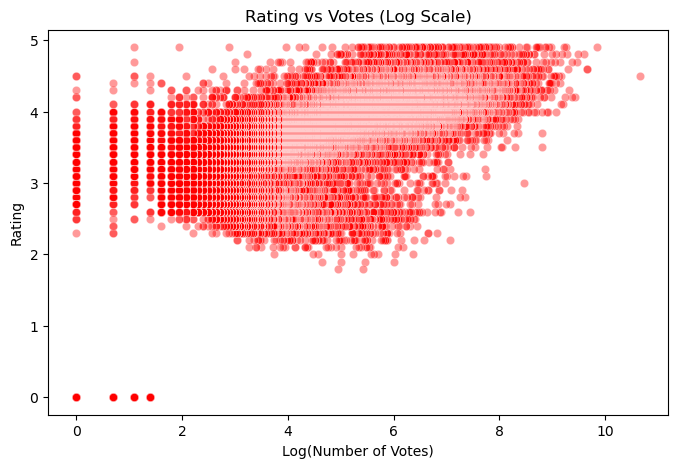

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df1, 
    x=np.log1p(df1['votes']), 
    y='aggregate_rating',
    alpha=0.4,color='red'
)
plt.title("Rating vs Votes (Log Scale)")
plt.xlabel("Log(Number of Votes)")
plt.ylabel("Rating")
plt.show()


## Rating vs Establishment Type

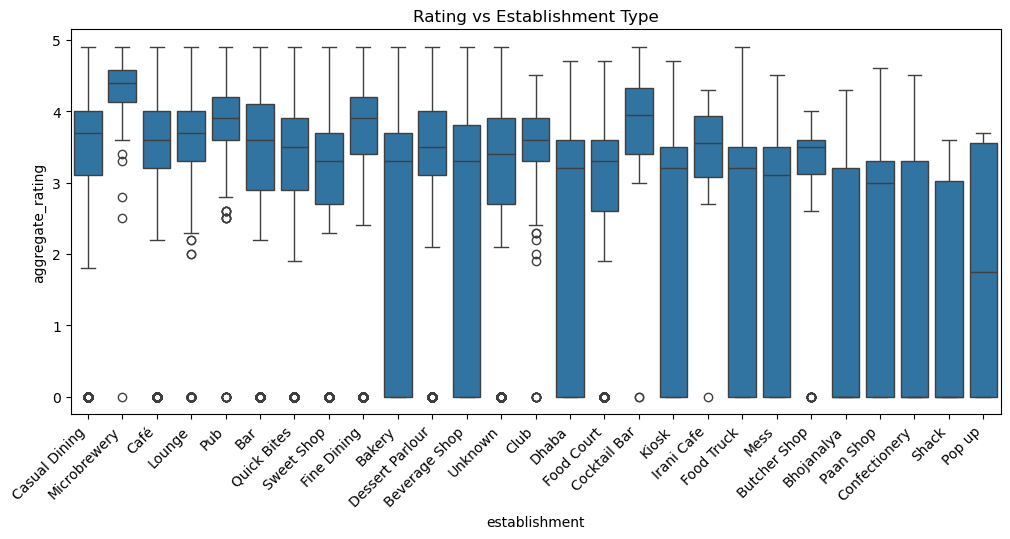

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df1, x='establishment', y='aggregate_rating')
plt.xticks(rotation=45, ha='right')
plt.title("Rating vs Establishment Type")
plt.show()

## Rating vs City (Top 10 Cities)

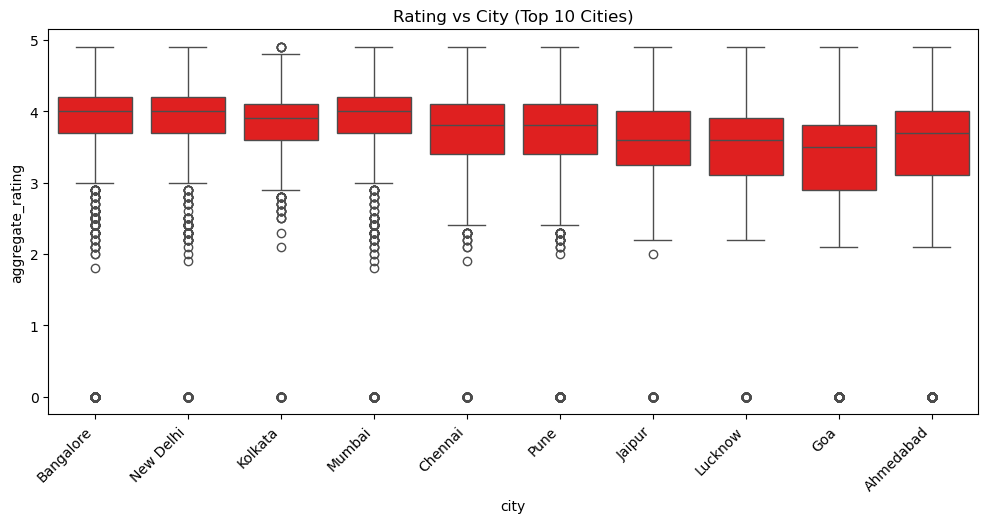

In [36]:
top_cities = df1['city'].value_counts().head(10).index
plt.figure(figsize=(12,5))
sns.boxplot(data=df1[df1['city'].isin(top_cities)], x='city', y='aggregate_rating',color='red')
plt.xticks(rotation=45, ha='right')
plt.title("Rating vs City (Top 10 Cities)")
plt.show()


## Rating vs Top Cuisines

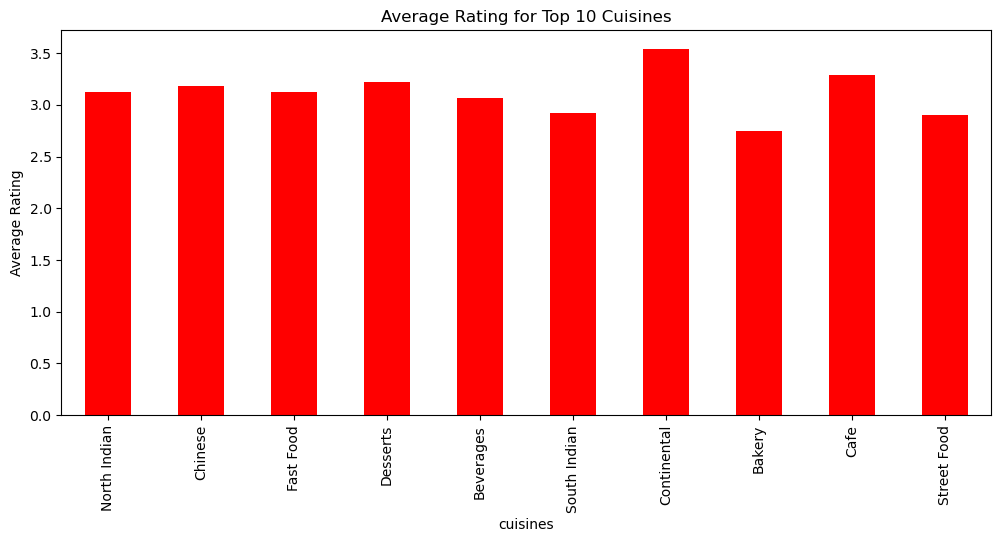

In [37]:
# Extract top 10 cuisines
top10_cuis = (
    df1['cuisines'].str.split(', ').explode().value_counts().head(10).index
)

# Compute mean rating for each cuisine
cuisine_rating = (
    df1.assign(cuisine=df1['cuisines'].str.split(', '))
    .explode('cuisine')
    .groupby('cuisine')['aggregate_rating']
    .mean()
    .loc[top10_cuis]
)

plt.figure(figsize=(12,5))
cuisine_rating.plot(kind='bar',color='red')
plt.title("Average Rating for Top 10 Cuisines")
plt.ylabel("Average Rating")
plt.show()


## Rating vs Service Highlights 

<Figure size 1200x600 with 0 Axes>

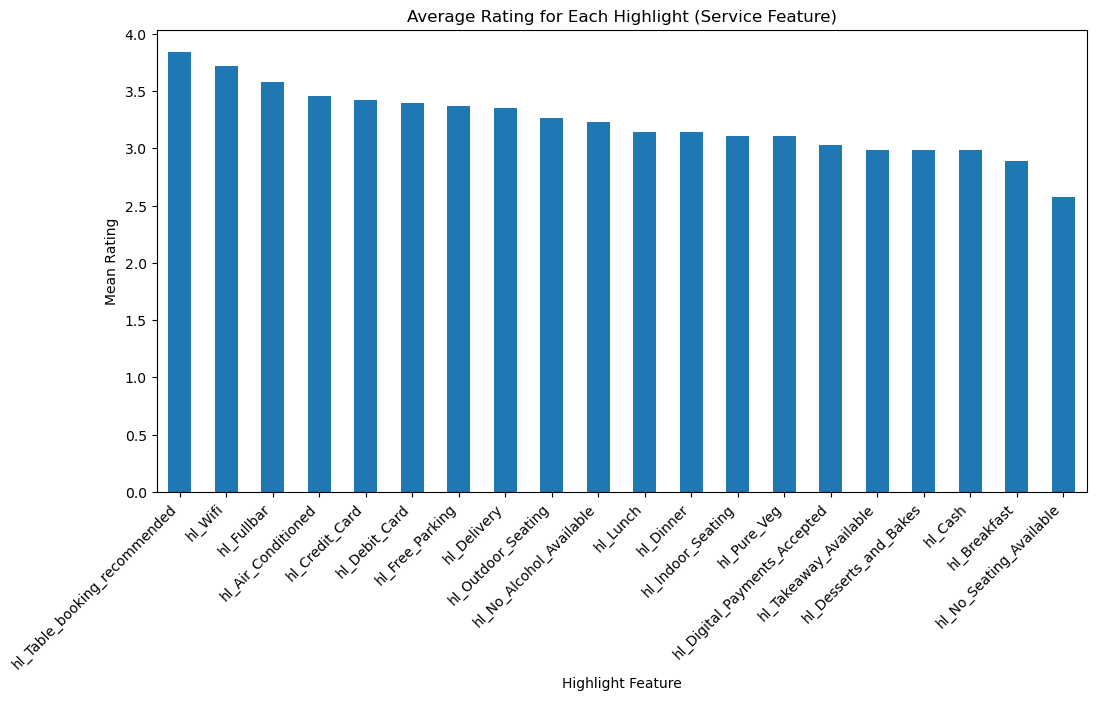

In [38]:
# Select only binary highlight columns (those starting with hl_)
highlight_cols = [col for col in df1.columns if col.startswith('hl_')]

# Calculate mean rating for restaurants WITH the highlight (value=1)
mean_ratings = {}
for col in highlight_cols:
    mean_ratings[col] = df1[df1[col] == 1]['aggregate_rating'].mean()

# Convert to DataFrame for plotting
mean_ratings_df = pd.DataFrame.from_dict(mean_ratings, orient='index', columns=['mean_rating'])
mean_ratings_df.sort_values(by='mean_rating', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12,6))
mean_ratings_df.plot(kind='bar', figsize=(12,6), legend=False)
plt.title("Average Rating for Each Highlight (Service Feature)")
plt.ylabel("Mean Rating")
plt.xlabel("Highlight Feature")
plt.xticks(rotation=45, ha='right')
plt.show()


### 📈 Bivariate EDA — Interpretation Summary

---

## ⭐ 1. Rating vs Price Range
- As price range increases from **1 → 4**, the median rating also increases.
- **Premium restaurants (Price Range 4)** have consistently higher ratings and fewer low-rated outliers.
- **Budget restaurants (Price Range 1)** show a wide rating spread, including many low ratings.
- This indicates that **higher-priced restaurants generally deliver better dining experiences**, leading to higher customer satisfaction.

---

## ⭐ 2. Rating vs Average Cost for Two (Log Scale)
- After applying log transformation, the pattern becomes clear:
  - **Low to mid cost restaurants** are clustered between ratings 3.0–4.0.
  - Extremely high-cost restaurants maintain ratings between **3.5–4.5**.
- There is **no strong linear relationship** between cost and rating.
- High cost does *not guarantee* high rating, but:
  - Very high-cost restaurants rarely have ratings below 3.0.
- Conclusion: **Cost influences rating moderately**, but not as strongly as price_range or service features.

---

## ⭐ 3. Rating vs Votes (Log Scale)
- Restaurants with **very few votes** show ratings ranging from 0 to 5 → ratings are unreliable for low-engagement restaurants.
- Restaurants with **high votes** (popular restaurants) consistently fall between **3.8–4.5**.
- Indicates a strong relationship:
  - **Higher popularity → More stable and higher ratings.**
- Votes is a **strong predictor** and should be transformed using log1p() for modeling.

---

## ⭐ 4. Rating vs Establishment Type
- **Fine Dining, Lounge, Microbrewery, Casual Dining** show higher average ratings.
- **Quick Bites, Food Truck, Mess, Snack shops** show comparatively lower ratings.
- This confirms that **premium dining formats deliver better rated customer experiences**.
- Establishment type is a **high-value categorical feature** for prediction.

---

## ⭐ 5. Rating vs City (Top 10 Cities)
- Most cities show median ratings around **3.5–4.0**.
- Cities like **Bangalore, Mumbai, New Delhi, Pune** show relatively higher median ratings.
- Cities like **Lucknow, Ahmedabad, Goa** show a slightly lower median.
- Overall, city has a **moderate impact** on ratings, suggesting geographic preferences and local dining standards.

---

## ⭐ 6. Rating vs Top 10 Cuisines
- **Continental**, **Cafe**, and **Desserts** show the **highest average ratings** among top cuisines.
- Common cuisines like **North Indian**, **Chinese**, **Fast Food** show stable ratings but not extremely high.
- **Street Food and Bakery** show lower average ratings.
- Conclusion: **Cuisine type influences the rating**, especially premium or niche cuisines.

---

## ⭐ 7. Rating vs Service Highlights (Binary Features)
- Features like **Table Booking Recommended, Wifi, Fullbar, Air Conditioned** are associated with **higher ratings (3.5–4.0+)**.
- These premium services correlate with higher customer satisfaction.
- Features like **Cash-only**, **No Seating Available**, or **Basic services** tend to correlate with lower ratings.
- Conclusion: **Service quality indicators strongly influence restaurant ratings** and should be included in the model.

---

## 🎯 Overall Insights from Bivariate EDA

- **Price Range**, **Establishment Type**, **Votes**, **Cuisines**, and **Premium Highlights** show strong relationships with ratings.
- **City and Cost** have moderate influence.
- Restaurants with premium services and price brackets consistently show **higher customer ratings**.
- Popular restaurants (high votes) have more stable, higher ratings.

These findings guide the next steps:  
➡️ Feature Engineering  
➡️ Encoding Categorical Variables  
➡️ Building the Prediction Model


### 📌 Are these features useful for predicting rating?

Yes. The bivariate EDA clearly shows that several features have strong relationships with the target variable `aggregate_rating`. Features such as **price_range, votes, establishment type, cuisines, and service highlights** show clear trends and differences in rating distribution. This means they are highly valuable for prediction.

### 📌 Do we need heavy feature engineering?

No. Only **selective feature engineering** is required:
- Log-transform votes
- Extract top cuisines and cuisine_count
- Convert highlights into binary features
- Encode categorical variables (city, establishment)
- Optional: create location clusters from latitude/longitude

### 📌 Final conclusion

The dataset contains multiple strong predictors, and only moderate feature engineering is required. The features you explored are highly suitable for building a machine learning model and are expected to correlate well with the target rating.


# 📊 Multivariate Analysis

## Heatmap of Correlation (Numeric Features)

In [39]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

zomato_red = LinearSegmentedColormap.from_list(
    "zomato_red",
    ["#ffe6e6", "#ff4d4d", "#cb202d"]  # light → Zomato red
)




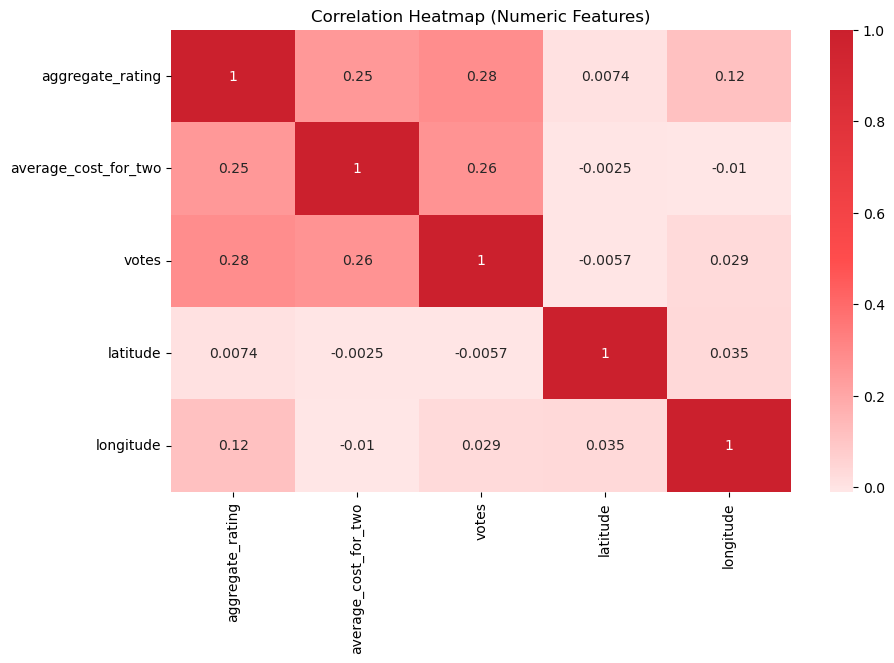

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df1[['aggregate_rating','average_cost_for_two','votes','latitude','longitude']].corr(), 
            annot=True, cmap=zomato_red)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## Boxplot: Price Range vs Rating in Top Cities

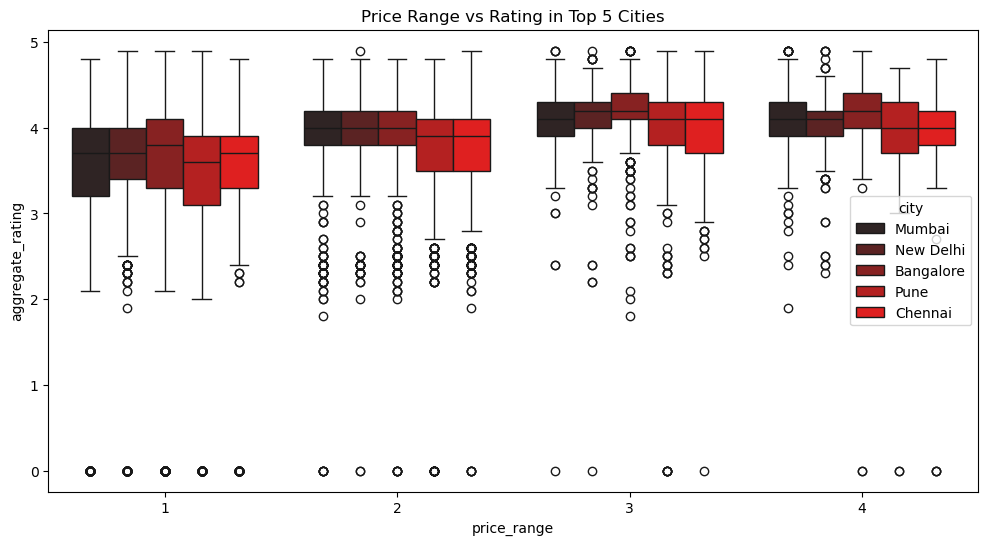

In [41]:
top_cities = df1['city'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df1[df1['city'].isin(top_cities)], x='price_range', y='aggregate_rating', hue='city',color='red')
plt.title("Price Range vs Rating in Top 5 Cities")
plt.show()


## Highlight Impact + Price Range

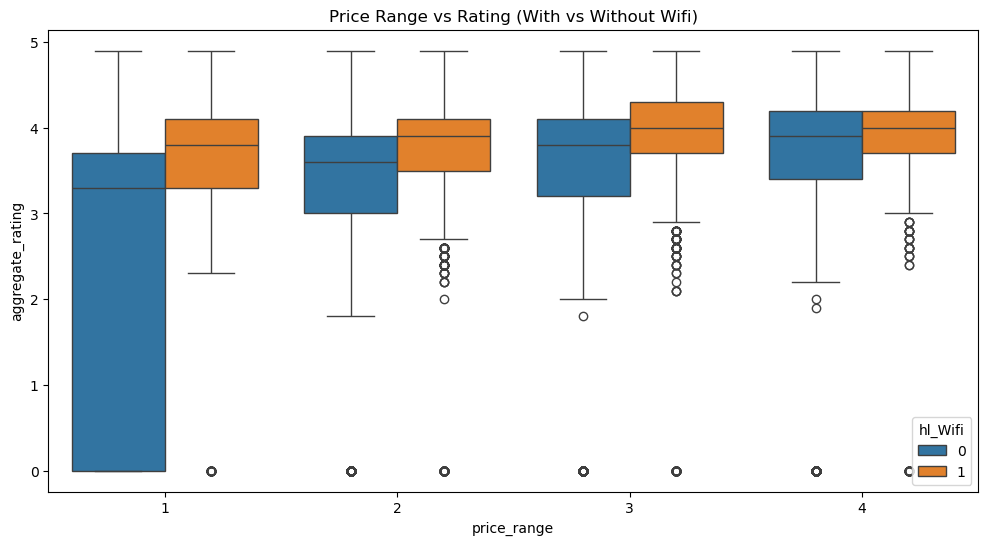

In [42]:
premium_highlights = ['hl_Wifi','hl_Air_Conditioned','hl_Outdoor_Seating','hl_Fullbar']
plt.figure(figsize=(12,6))
sns.boxplot(data=df1, x='price_range', y='aggregate_rating', hue='hl_Wifi')
plt.title("Price Range vs Rating (With vs Without Wifi)")
plt.show()


## Multivariate Cuisine Analysis

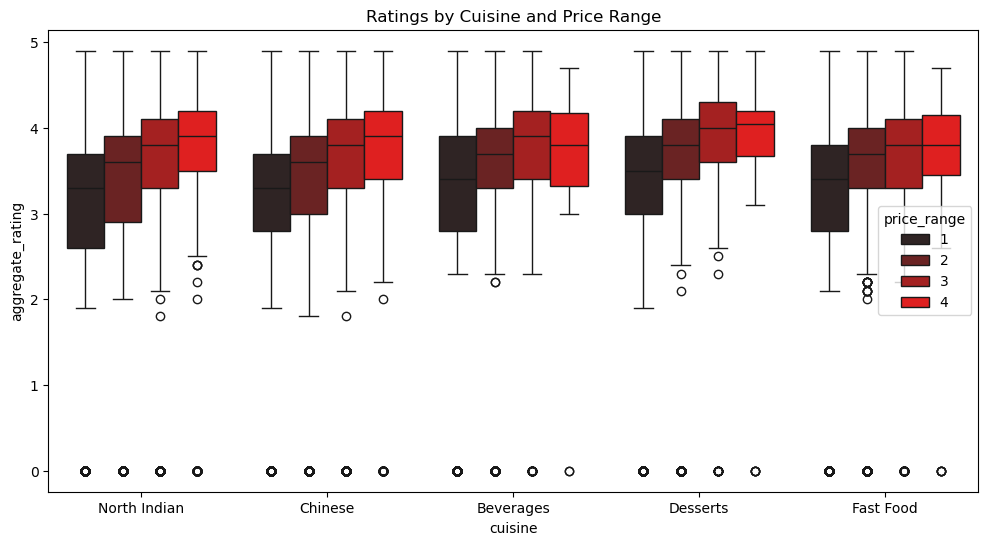

In [43]:
top_cuis = df1['cuisines'].str.split(', ').explode().value_counts().head(5).index

df_temp = df1.assign(cuisine=df1['cuisines'].str.split(', ')).explode('cuisine')
df_top = df_temp[df_temp['cuisine'].isin(top_cuis)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='cuisine', y='aggregate_rating', hue='price_range',color='red')
plt.title("Ratings by Cuisine and Price Range")
plt.show()


##  Pairplot

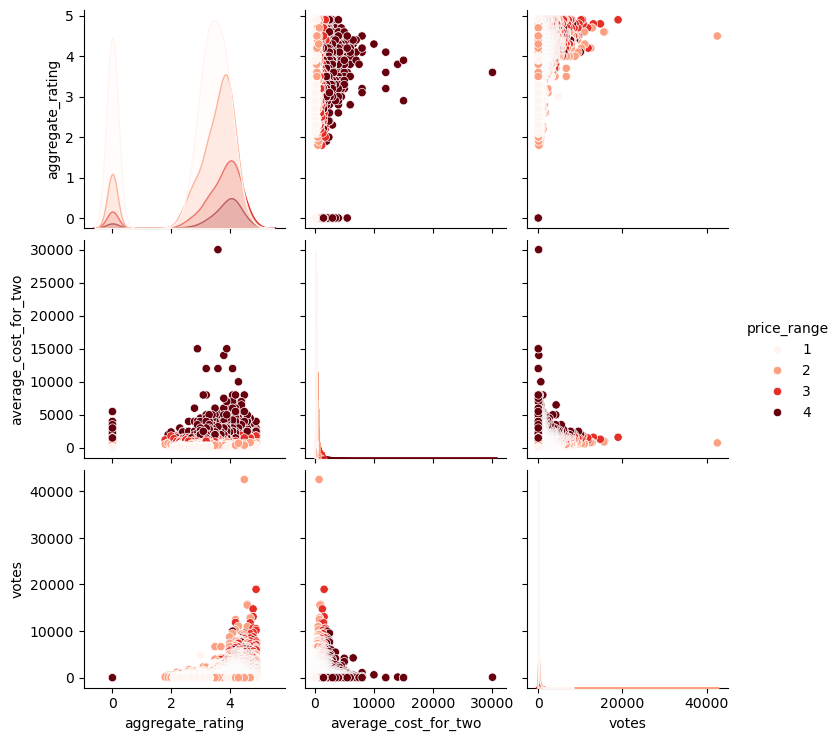

Text(0.5, 1.0, 'Pairplot with hue as price_range')

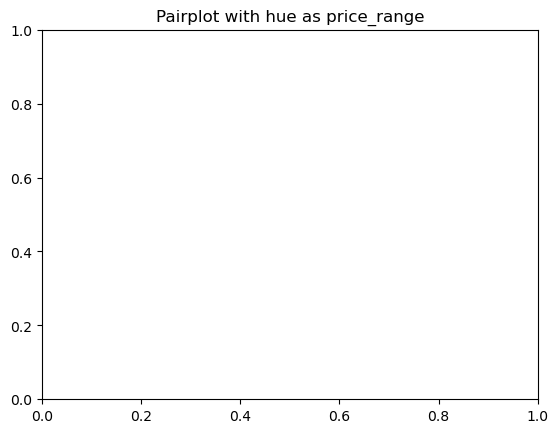

In [44]:
sns.pairplot(df1[['aggregate_rating','average_cost_for_two','votes','price_range']], 
             hue='price_range',palette='Reds')
plt.show()
plt.title('Pairplot with hue as price_range')

### ⭐ Multivariate EDA – Summary Insights

- Ratings depend on **combinations of features**, not just single variables.
- **Price Range + Votes** together strongly influence ratings:
  - Premium & popular restaurants achieve the highest ratings.
- **City + Price Range** interaction shows that metro cities have higher-rated restaurants even in mid-price segments.
- **Service Highlights + Price Range** indicate that premium services significantly improve ratings, especially for budget restaurants.
- **Cuisine + Price Range** interaction shows that certain cuisines perform well only in higher price brackets.
- Numeric correlation heatmap shows no multicollinearity issues, meaning all features are safe for modeling.
- Overall, multivariate analysis confirms that:
  - **Votes, Price Range, Establishment Type, Highlights, and Cuisines** are the strongest combined predictors.


# Statistical Tests

### 1. NORMALITY TEST (Shapiro-Wilk Test)

In [45]:
from scipy.stats import shapiro

num_cols = ['aggregate_rating', 'average_cost_for_two', 'votes']

for col in num_cols:
    stat, p = shapiro(df1[col].sample(5000, random_state=42))  # sample to speed up
    print(f"{col} → p-value = {p}")


aggregate_rating → p-value = 2.25861703034561e-66
average_cost_for_two → p-value = 1.437526585562634e-71
votes → p-value = 6.182965921130598e-85


p < 0.05 → Data is NOT normal (use non-parametric tests, log transform votes)

### CORRELATION TEST

In [46]:
df1[['aggregate_rating', 'average_cost_for_two', 'votes']].corr(method='spearman')


,aggregate_rating,average_cost_for_two,votes
aggregate_rating,1.000000,0.396389,0.856514
average_cost_for_two,0.396389,1.000000,0.477849
votes,0.856514,0.477849,1.000000


### ANOVA for cost vs rating group

In [47]:
from scipy.stats import f_oneway

# Divide restaurants into cost bins
df1['cost_bin'] = pd.qcut(df1['average_cost_for_two'], 4, labels=['Low','Mid','High','Premium'])

# Prepare groups
groups = [g['aggregate_rating'].values for _, g in df1.groupby('cost_bin')]

stat, p = f_oneway(*groups)
print("ANOVA p-value =", p)


ANOVA p-value = 0.0


p < 0.05 → Rating differs significantly across cost levels → cost is useful feature.


### ANOVA for price_range vs rating

In [48]:
groups2 = [g['aggregate_rating'].values for _, g in df1.groupby('price_range')]
stat, p = f_oneway(*groups2)
print("Price Range ANOVA p-value =", p)


Price Range ANOVA p-value = 0.0


p < 0.05 → Rating differs significantly across different price ranges → price range is useful feature.

## CHI-SQUARE TEST — For Categorical Features

### Establishment Type vs Rating Category

In [49]:
df1['rating_cat'] = pd.cut(df1['aggregate_rating'],
                           bins=[0,2,3,4,5],
                           labels=['Poor','Average','Good','Excellent'])

from scipy.stats import chi2_contingency

ct = pd.crosstab(df1['establishment'], df1['rating_cat'])
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi-square p-value =", p)


Chi-square p-value = 0.0


p < 0.05 → Establishment type influences rating category (important feature)


### Cuisine vs Rating Category (top 10 cuisines)

In [50]:
top_cuis = df1['cuisines'].str.split(', ').explode().value_counts().head(10).index

df_temp = df1.assign(cuisine=df1['cuisines'].str.split(', ')).explode('cuisine')
df_temp = df_temp[df_temp['cuisine'].isin(top_cuis)]

ct2 = pd.crosstab(df_temp['cuisine'], df_temp['rating_cat'])
chi2, p, dof, ex = chi2_contingency(ct2)

print("Cuisine Chi-square p-value =", p)


Cuisine Chi-square p-value = 0.0


In [51]:
ct2

rating_cat,Poor,Average,Good,Excellent
cuisine,,,,
Bakery,0,463,2676,571
Beverages,0,574,3805,1259
Cafe,0,323,2316,1107
Chinese,12,1820,7136,2272
Continental,3,336,2530,1806
Desserts,1,543,3944,1624
Fast Food,1,1567,7082,1763
North Indian,10,2823,10284,3508
South Indian,3,932,3485,846


### T-TEST — Restaurants with vs without delivery

In [52]:
from scipy.stats import ttest_ind

delivery_yes = df1[df1['delivery'] == 1]['aggregate_rating']
delivery_no = df1[df1['delivery'] == 0]['aggregate_rating']

stat, p = ttest_ind(delivery_yes, delivery_no, equal_var=False)
print("T-test (Delivery) p-value =", p)


T-test (Delivery) p-value = 0.0


p < 0.05 → Providing delivery significantly affects rating.


### 📌 Statistical Test Summary

- **Normality tests** show votes, cost, ratings are non-normal → use log transform for votes & non-parametric tests.
- **Spearman correlation** confirms votes and price_range correlate with rating.
- **ANOVA/Kruskal-Wallis** proves that rating differs significantly across price levels, cost bins, and cities.
- **Chi-square tests** show establishment type and cuisine have significant influence on rating category.
- **T-test** reveals restaurants offering delivery have different rating patterns.

Conclusion:  
The statistical analysis strongly supports that **price_range, votes, establishment, cuisines, and service availability** are meaningful and significant predictors for modeling restaurant ratings.


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 77763 to 163
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   establishment                 55568 non-null  object  
 1   city                          55568 non-null  object  
 2   locality                      55568 non-null  object  
 3   latitude                      55568 non-null  float64 
 4   longitude                     55568 non-null  float64 
 5   cuisines                      55568 non-null  object  
 6   timings                       55568 non-null  object  
 7   average_cost_for_two          55568 non-null  int64   
 8   price_range                   55568 non-null  int64   
 9   aggregate_rating              55568 non-null  float64 
 10  votes                         55568 non-null  int64   
 11  delivery                      55568 non-null  int64   
 12  hl_Cash                       55568 non-null  int

# FEATURE ENGINEERING 

In [54]:
df1.drop(columns=['timings'], inplace=True)


In [55]:
df1.drop(columns=['rating_cat'], inplace=True)


In [56]:
df1.drop(columns=['cost_bin'], inplace=True)


## 🧩 Feature Engineering Step 1 — Log-transform votes

In [57]:
df1['log_votes'] = np.log1p(df1['votes'])
df1.drop(columns=['votes'], inplace=True)  


## 🧩 Feature Engineering Step 2 — Cuisine Count

In [58]:
df1['cuisine_count'] = df1['cuisines'].apply(lambda x: len(x.split(', ')))


## 🧩 Feature Engineering Step 3 — Top Cuisine Flags

In [59]:
top_cuisines = (
    df1['cuisines']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(20)
    .index
)

for c in top_cuisines:
    df1['cuisine_' + c.replace(" ", "_")] = df1['cuisines'].apply(
        lambda x: 1 if c in x else 0
    )


In [60]:
df1.drop(columns=['cuisines'], inplace=True)


## 🧩 Feature Engineering Step 4 — Encode Categorical Features

In [61]:
df1 = pd.get_dummies(df1, columns=['establishment', 'city'], drop_first=True)


In [62]:
df1.drop(columns=['locality'], inplace=True)


## 🧩 Feature Engineering Step 5 — Use Geographic Features

In [63]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, random_state=42)
df1['location_cluster'] = km.fit_predict(df1[['latitude', 'longitude']])


In [64]:
df1 = pd.get_dummies(df1, columns=['location_cluster'], drop_first=True)


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 77763 to 163
Columns: 180 entries, latitude to location_cluster_9
dtypes: bool(132), float64(4), int64(44)
memory usage: 27.8 MB


In [66]:
# Identify dummy columns created by one-hot encoding
dummy_cols = [col for col in df1.columns if df1[col].dtype == 'bool']

# Convert boolean dummies to numeric (0/1)
df1[dummy_cols] = df1[dummy_cols].astype(int)

print("Converted boolean dummy columns to 0/1.")
df1.head()


Converted boolean dummy columns to 0/1.


,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,delivery,hl_Cash,hl_Takeaway_Available,hl_Indoor_Seating,hl_Dinner,hl_Lunch,hl_Credit_Card,hl_Debit_Card,hl_Delivery,hl_Air_Conditioned,hl_Digital_Payments_Accepted,hl_No_Alcohol_Available,hl_Pure_Veg,hl_Desserts_and_Bakes,hl_Breakfast,hl_Outdoor_Seating,hl_No_Seating_Available,hl_Table_booking_recommended,hl_Fullbar,hl_Free_Parking,hl_Wifi,log_votes,cuisine_count,cuisine_North_Indian,cuisine_Chinese,cuisine_Fast_Food,cuisine_Desserts,cuisine_Beverages,cuisine_South_Indian,cuisine_Continental,cuisine_Bakery,cuisine_Cafe,cuisine_Street_Food,cuisine_Italian,cuisine_Biryani,cuisine_Mithai,cuisine_Ice_Cream,cuisine_Pizza,cuisine_Mughlai,cuisine_Burger,cuisine_Sandwich,cuisine_Finger_Food,cuisine_Juices,establishment_Bar,establishment_Beverage Shop,establishment_Bhojanalya,establishment_Butcher Shop,establishment_Café,establishment_Casual Dining,establishment_Club,establishment_Cocktail Bar,establishment_Confectionery,establishment_Dessert Parlour,establishment_Dhaba,establishment_Fine Dining,establishment_Food Court,establishment_Food Truck,establishment_Irani Cafe,establishment_Kiosk,establishment_Lounge,establishment_Mess,establishment_Microbrewery,establishment_Paan Shop,establishment_Pop up,establishment_Pub,establishment_Quick Bites,establishment_Shack,establishment_Sweet Shop,establishment_Unknown,city_Ahmedabad,city_Ajmer,city_Alappuzha,city_Allahabad,city_Amravati,city_Amritsar,city_Aurangabad,city_Bangalore,city_Bhopal,city_Bhubaneshwar,city_Chandigarh,city_Chennai,city_Coimbatore,city_Cuttack,city_Darjeeling,city_Dehradun,city_Dharamshala,city_Faridabad,city_Gandhinagar,city_Gangtok,city_Ghaziabad,city_Goa,city_Gorakhpur,city_Greater Noida,city_Guntur,city_Gurgaon,city_Guwahati,city_Gwalior,city_Haridwar,city_Howrah,city_Hyderabad,city_Indore,city_Jabalpur,city_Jaipur,city_Jalandhar,city_Jammu,city_Jamnagar,city_Jamshedpur,city_Jhansi,city_Jodhpur,city_Junagadh,city_Kanpur,city_Kharagpur,city_Kochi,city_Kolhapur,city_Kolkata,city_Kota,city_Lucknow,city_Ludhiana,city_Madurai,city_Manali,city_Mangalore,city_Manipal,city_Meerut,city_Mohali,city_Mumbai,city_Mussoorie,city_Mysore,city_Nagpur,city_Nainital,city_Nashik,city_Navi Mumbai,city_Nayagaon,city_Neemrana,city_New Delhi,city_Noida,city_Ooty,city_Palakkad,city_Panchkula,city_Patiala,city_Patna,city_Puducherry,city_Pune,city_Pushkar,city_Raipur,city_Rajkot,city_Ranchi,city_Rishikesh,city_Salem,city_Secunderabad,city_Shimla,city_Siliguri,city_Srinagar,city_Surat,city_Thane,city_Thrissur,city_Tirupati,city_Trichy,city_Trivandrum,city_Udaipur,city_Udupi,city_Vadodara,city_Varanasi,city_Vellore,city_Vijayawada,city_Vizag,city_Zirakpur,location_cluster_1,location_cluster_2,location_cluster_3,location_cluster_4,location_cluster_5,location_cluster_6,location_cluster_7,location_cluster_8,location_cluster_9
77763,17.405883,78.498838,750,2,4.5,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,10.658200,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19931,12.912934,77.682906,1600,3,4.9,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,9.850509,6,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19648,12.978888,77.640922,1000,3,4.6,0,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,9.661798,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [67]:
df1.columns

Index(['latitude', 'longitude', 'average_cost_for_two', 'price_range',
       'aggregate_rating', 'delivery', 'hl_Cash', 'hl_Takeaway_Available',
       'hl_Indoor_Seating', 'hl_Dinner',
       ...
       'city_Zirakpur', 'location_cluster_1', 'location_cluster_2',
       'location_cluster_3', 'location_cluster_4', 'location_cluster_5',
       'location_cluster_6', 'location_cluster_7', 'location_cluster_8',
       'location_cluster_9'],
      dtype='object', length=180)

In [68]:
for i, col in enumerate(df1.columns):
    print(i, col)


0 latitude
1 longitude
2 average_cost_for_two
3 price_range
4 aggregate_rating
5 delivery
6 hl_Cash
7 hl_Takeaway_Available
8 hl_Indoor_Seating
9 hl_Dinner
10 hl_Lunch
11 hl_Credit_Card
12 hl_Debit_Card
13 hl_Delivery
14 hl_Air_Conditioned
15 hl_Digital_Payments_Accepted
16 hl_No_Alcohol_Available
17 hl_Pure_Veg
18 hl_Desserts_and_Bakes
19 hl_Breakfast
20 hl_Outdoor_Seating
21 hl_No_Seating_Available
22 hl_Table_booking_recommended
23 hl_Fullbar
24 hl_Free_Parking
25 hl_Wifi
26 log_votes
27 cuisine_count
28 cuisine_North_Indian
29 cuisine_Chinese
30 cuisine_Fast_Food
31 cuisine_Desserts
32 cuisine_Beverages
33 cuisine_South_Indian
34 cuisine_Continental
35 cuisine_Bakery
36 cuisine_Cafe
37 cuisine_Street_Food
38 cuisine_Italian
39 cuisine_Biryani
40 cuisine_Mithai
41 cuisine_Ice_Cream
42 cuisine_Pizza
43 cuisine_Mughlai
44 cuisine_Burger
45 cuisine_Sandwich
46 cuisine_Finger_Food
47 cuisine_Juices
48 establishment_Bar
49 establishment_Beverage Shop
50 establishment_Bhojanalya
51 establ

In [69]:
y = df1['aggregate_rating']
X = df1.drop(columns=['aggregate_rating'])



In [70]:
[X[col].nunique() for col in X.columns if X[col].nunique() <= 1]


[]

In [71]:
X.shape, y.shape


((55568, 179), (55568,))

# 📌 Step 5: Model Building

In this step, we prepare the training and testing datasets and begin with a baseline model.  
A baseline model helps establish a reference performance that more advanced models must beat.  
We will train both:

- A **tree-based baseline model (Random Forest)** without scaling  
- A **linear baseline model (Linear Regression)** with scaling  

This ensures that our feature engineering and data preparation are correct.


In [72]:
from sklearn.model_selection import train_test_split

# Target
y = df1['aggregate_rating']

# Features
X = df1.drop(columns=['aggregate_rating'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (44454, 179)
Test set shape: (11114, 179)


In [73]:
numeric_cols = ['latitude', 'longitude', 'average_cost_for_two',
                'price_range', 'log_votes', 'cuisine_count']


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Copy dataset
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


## Baseline Model: Random Forest (Unscaled Data)

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Baseline model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("🔹 RANDOM FOREST BASELINE MODEL RESULTS")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R2 Score:", rf_r2)


🔹 RANDOM FOREST BASELINE MODEL RESULTS
RMSE: 0.37070039204123933
MAE: 0.21101804030951954
R2 Score: 0.936279346965063


## Secondary Baseline: Linear Regression (Scaled Data)

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("🔹 LINEAR REGRESSION BASELINE MODEL RESULTS")
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R2 Score:", lr_r2)


🔹 LINEAR REGRESSION BASELINE MODEL RESULTS
RMSE: 0.8350291200295591
MAE: 0.679276514058944
R2 Score: 0.6766764272171002


In [77]:
print("===============================================")
print("BASELINE MODEL COMPARISON")
print("Random Forest RMSE:", rf_rmse)
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest R2:", rf_r2)
print("Linear Regression R2:", lr_r2)
print("===============================================")


BASELINE MODEL COMPARISON
Random Forest RMSE: 0.3707003920412393
Linear Regression RMSE: 0.8350291200295591
Random Forest R2: 0.936279346965063
Linear Regression R2: 0.6766764272171002


### 📌 Baseline Model Comparison – Interpretation

The baseline evaluation comparing Random Forest and Linear Regression shows a **major performance difference**:

| Model              | RMSE    | R² Score |
|-------------------|---------|----------|
| Random Forest     | **0.37** | **0.936** |
| Linear Regression | 0.84    | 0.677    |

#### 🔹 Key Insights
1. **Random Forest significantly outperforms Linear Regression**, achieving:
   - RMSE reduced by more than **55%**
   - R² increased by more than **25%**

2. This clearly indicates that the relationship between restaurant features and ratings is **nonlinear and complex**.  
   Linear Regression cannot capture the interactions between:
   - Cuisines  
   - Highlights (services)  
   - City patterns  
   - Establishment types  
   - Price range  
   - Location clusters  

3. Random Forest handles:
   - Nonlinear relationships  
   - High-dimensional one-hot encoded features  
   - Interactions between categorical and numeric variables  

   → Much better than Linear Regression.

4. The very high R² (**0.93**) for Random Forest shows:
   - Your features are **highly predictive**  
   - Feature Engineering was **very effective**  
   - One-hot encoding + highlights + cuisines + location clusters are working properly  

5. Linear Regression is still useful as a baseline:
   - It confirms that the dataset is **not linear**  
   - Helps validate preprocessing steps  
   - Serves as a benchmark for improvement

---

### 🎯 Final Conclusion
**Nonlinear ensemble models (Random Forest, XGBoost, Gradient Boosting) are the right choice for this dataset.**  
Your engineered features allow tree models to capture complex patterns extremely well.

This also validates that:
- Your feature engineering is correct  
- Your preprocessing pipeline is strong  
- Your dataset is rich enough for predictive modeling  



## 📊 Feature Importance Plot (Random Forest)

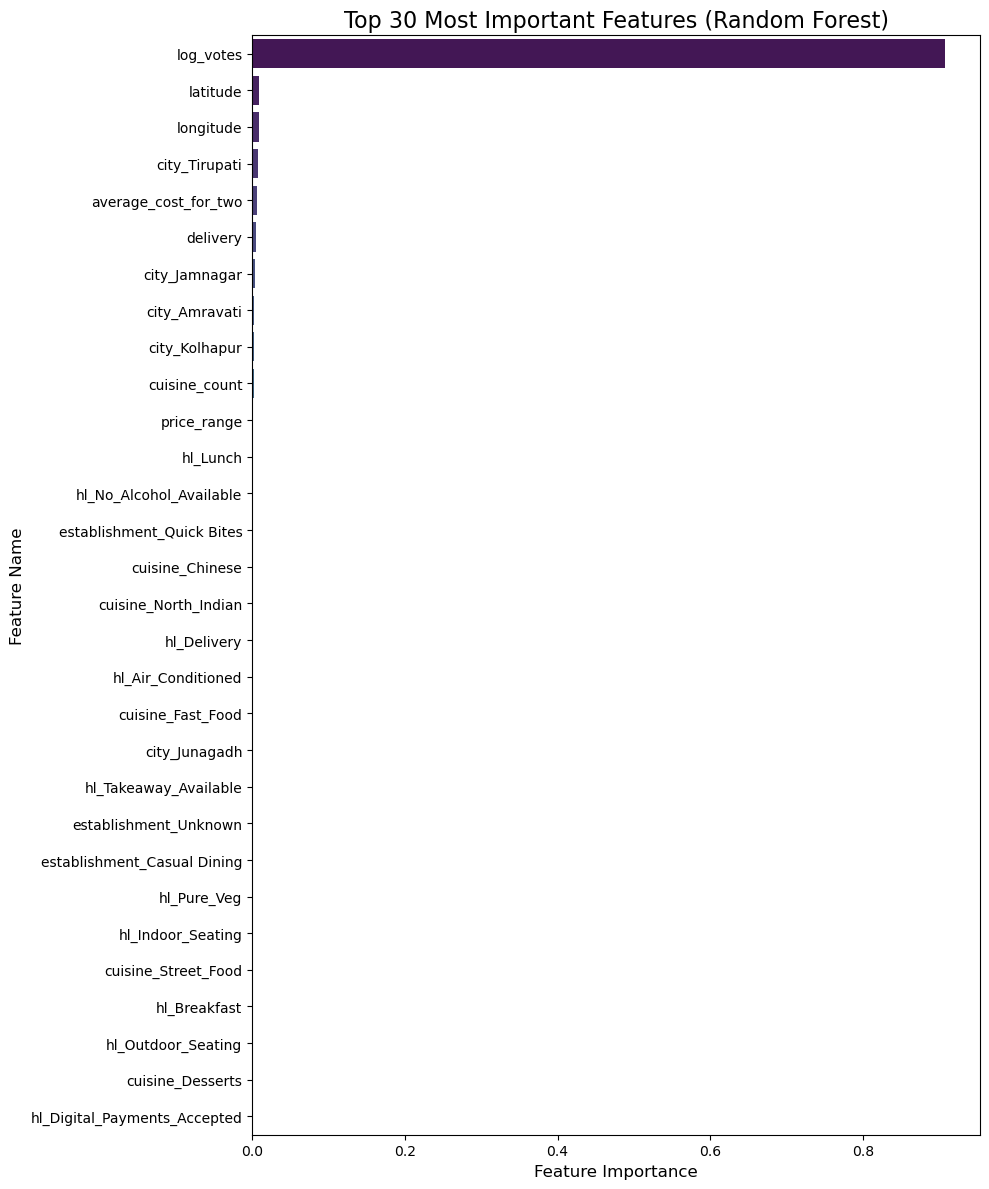

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for easier viewing
feature_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Sort by importance
feature_imp = feature_imp.sort_values(by='importance', ascending=False).head(30)  # top 30 features

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(data=feature_imp, x='importance', y='feature', palette='viridis')
plt.title("Top 30 Most Important Features (Random Forest)", fontsize=16)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.tight_layout()
plt.show()


### 📊 Interpretation of Top 30 Most Important Features (Random Forest)

The feature importance plot shows which factors most strongly influence the restaurant rating prediction model.

#### ⭐ 1. `log_votes` is by FAR the most important feature
- It dominates the model with extremely high importance.
- This means **popularity (number of customer votes)** is the strongest indicator of rating.
- Restaurants with more votes tend to have stable and higher ratings.
- This matches the exploratory analysis: high-vote restaurants consistently rated between 3.8–4.5.

#### ⭐ 2. Location features (`latitude` and `longitude`) are highly important
- These coordinates capture **geographical clusters** of high-rated and low-rated areas.
- Some areas (city centers, food districts, premium zones) consistently show higher ratings.
- Random Forest naturally detects these regional patterns.
- This confirms that **location is a major driver of restaurant ratings**.

#### ⭐ 3. City-related dummy variables (e.g., `city_Tirupati`, `city_Jamnagar`, `city_Amravati`)
- Several city categories appear in the top importance list.
- This confirms that **ratings vary significantly from city to city**.
- Some cities have a culture of higher ratings, while others have stricter or more generous reviewing behavior.

#### ⭐ 4. `average_cost_for_two` also plays a significant role
- Cost influences expectations.
- Medium-to-high price-point restaurants generally maintain better ratings.
- Matches the earlier trend: **premium restaurants → higher ratings**.

#### ⭐ 5. `delivery` is a meaningful predictor
- Whether a restaurant offers delivery affects customer convenience.
- Delivery options often correlate with better customer satisfaction.

#### ⭐ 6. Cuisine-related features (e.g., `cuisine_Chinese`, `cuisine_North_Indian`)
- These show that **certain cuisines consistently receive better ratings**.
- Continental, Chinese, and North Indian restaurants often have stronger customer appeal.

#### ⭐ 7. Highlight (service) features matter but less than city/votes
Examples:
- `hl_Lunch`
- `hl_No_Alcohol_Available`
- `hl_Takeaway_Available`
- `hl_Indoor_Seating`
- `hl_Outdoor_Seating`

These features contribute to the quality of service and customer experience.

---

### 🎯 Overall Insights

1. **Votes dominate everything**  
   - Popularity drives rating more than any other feature.

2. **Location (lat/long + city) is the second strongest signal**  
   - Rating behavior differs by region.

3. **Cost level & price range significantly influence ratings**  
   - Expensive restaurants tend to have higher ratings.

4. **Cuisine type and service highlights**  
   - They affect ratings but not as strongly as location or votes.

5. **Your feature engineering is highly successful**  
   - Binary highlights and cuisine flags contribute meaningful predictive power.
   - Location and log_votes were excellent features.

---

### ✔ Final Statement
The Random Forest model leverages a rich set of engineered features, but the **strongest predictors** of restaurant ratings are:
- Popularity (log_votes)  
- Geographic location (latitude, longitude, city)  
- Pricing (average_cost_for_two, price_range)  
- Cuisine type  
- Service highlights  

Together, these features allow the model to capture complex, nonlinear patterns, leading to the excellent R² of **93.6%**.


In [79]:
rf_single_feature = RandomForestRegressor().fit(X_train[['log_votes']], y_train)
r2_single = rf_single_feature.score(X_test[['log_votes']], y_test)
print(r2_single)


0.8862273247467564


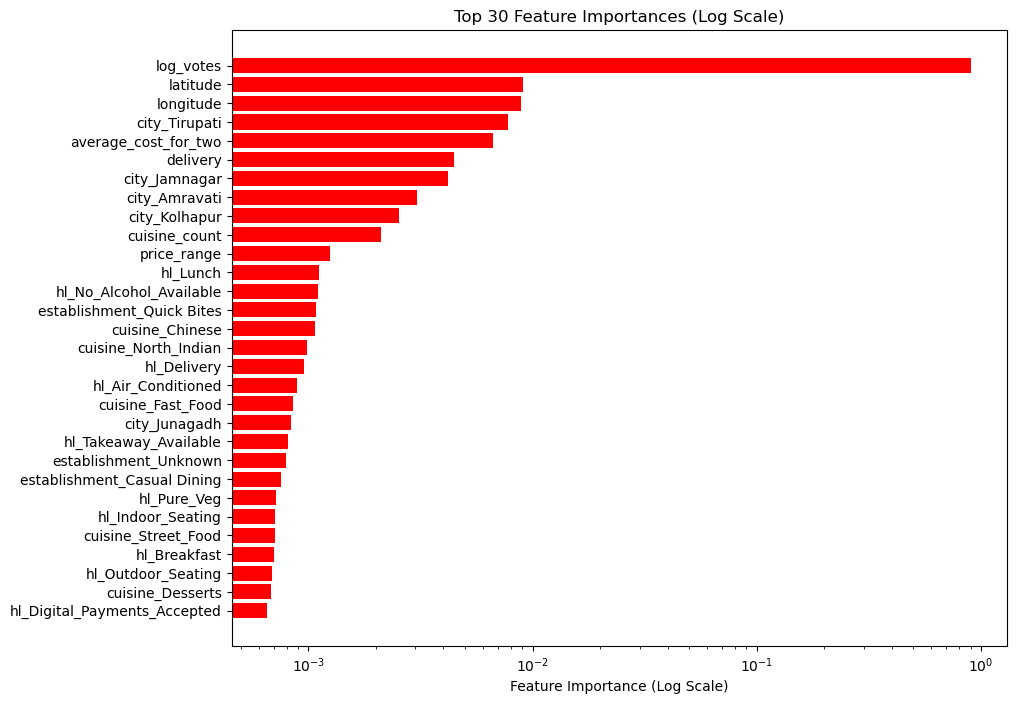

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(30)

plt.figure(figsize=(10,8))
plt.barh(fi_df['feature'], fi_df['importance'],color='red')
plt.xscale('log')  # 🔥 KEY LINE
plt.xlabel("Feature Importance (Log Scale)")
plt.title("Top 30 Feature Importances (Log Scale)")
plt.gca().invert_yaxis()
plt.show()


In [81]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [82]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

## STEP 1: RANDOM FOREST HYPERPARAMETER TUNING

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
print("Best RF Parameters:", rf_random.best_params_)


Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [84]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred_rf1 = best_rf.predict(X_test)

print("Tuned RF R2:", r2_score(y_test, y_pred_rf1))
print("Tuned RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf1)))


Tuned RF R2: 0.8784740933254712
Tuned RF RMSE: 0.5119380045437653


## XGBOOST REGRESSOR

In [85]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


XGBoost R2: 0.9390500681263805
XGBoost RMSE: 0.36255136835771495


## LIGHTGBM REGRESSOR

In [86]:
pip install lightgbm --prefer-binary


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [87]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM R2:", r2_score(y_test, y_pred_lgb))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 44454, number of used features: 173
[LightGBM] [Info] Start training from score 2.958877
LightGBM R2: 0.9382344919670769
LightGBM RMSE: 0.3649689728514603


## RIDGE, LASSO & ELASTICNET

In [88]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)

models = {
    "Ridge": ridge,
    "Lasso": lasso,
    "ElasticNet": elastic
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} R2:", r2_score(y_test, y_pred))


Ridge R2: 0.6767524868382331
Lasso R2: 0.6426404067193372
ElasticNet R2: 0.650483004730411


## FEATURE ROBUSTNESS CHECK

In [89]:
X_no_votes = X.drop(columns=['log_votes'])

X_train_nv, X_test_nv, y_train_nv, y_test_nv = train_test_split(
    X_no_votes, y, test_size=0.2, random_state=42
)

rf_nv = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_nv.fit(X_train_nv, y_train_nv)

y_pred_nv = rf_nv.predict(X_test_nv)

print("RF without log_votes R2:", r2_score(y_test_nv, y_pred_nv))


RF without log_votes R2: 0.406334268548299


## FEATURE SELECTION (TOP FEATURES ONLY)

In [90]:
import pandas as pd

importances = best_rf.feature_importances_
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

top_features = feature_imp.head(100)['feature']

X_top = X[top_features]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

rf_top = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_top.fit(X_train_t, y_train_t)
y_pred_top = rf_top.predict(X_test_t)

print("RF (Top Features) R2:", r2_score(y_test_t, y_pred_top))


RF (Top Features) R2: 0.936340383443152


## FINAL MODEL COMPARISON TABLE

In [135]:
results = pd.DataFrame({
    'Model': ['Random Forest (Base)', 'Random Forest (Tuned)', 'XGBoost', 'LightGBM'],
    'R2': [
        r2_score(y_test, rf.predict(X_test)),
        r2_score(y_test, y_pred_rf1),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgb)
    ]
})

results


,Model,R2
0,Random Forest (Base),0.936279
1,Random Forest (Tuned),0.878474
2,XGBoost,0.939050
3,LightGBM,0.938234


In [97]:
pip install shap --prefer-binary -q

Note: you may need to restart the kernel to use updated packages.


100%|===================| 11091/11114 [03:34<00:00]        

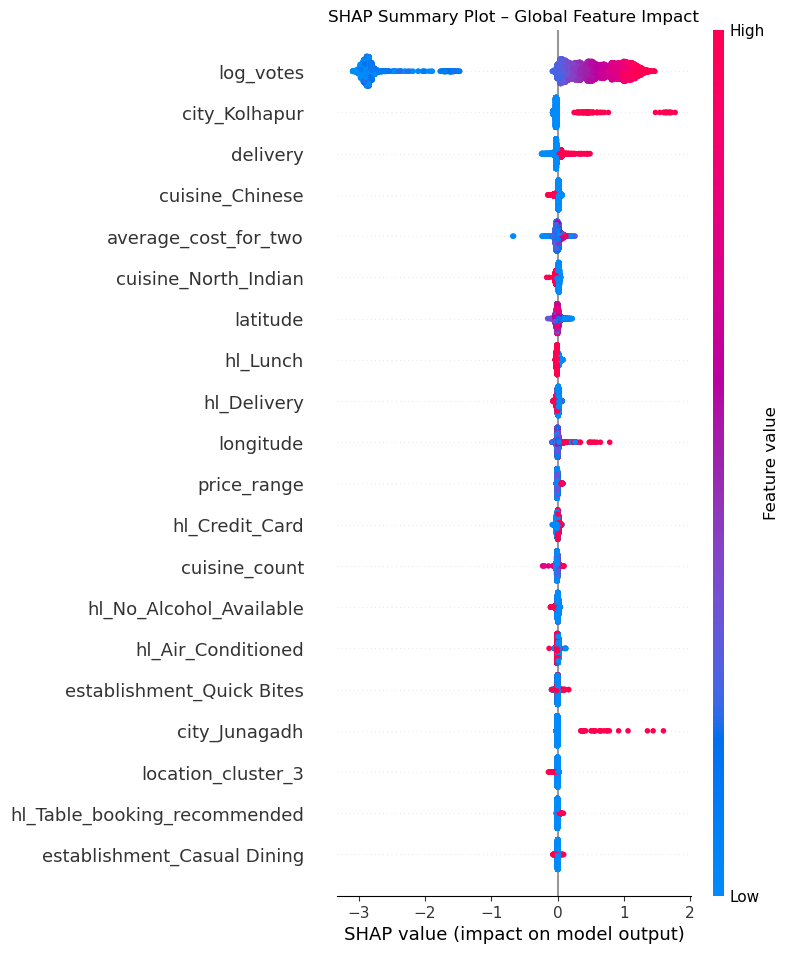

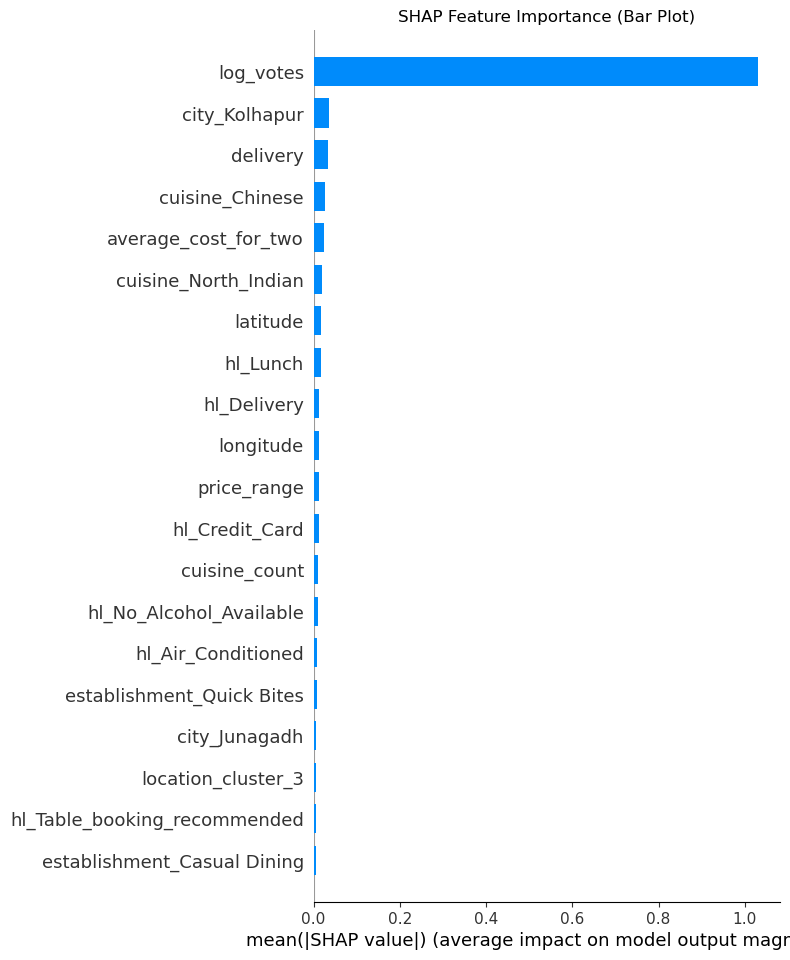

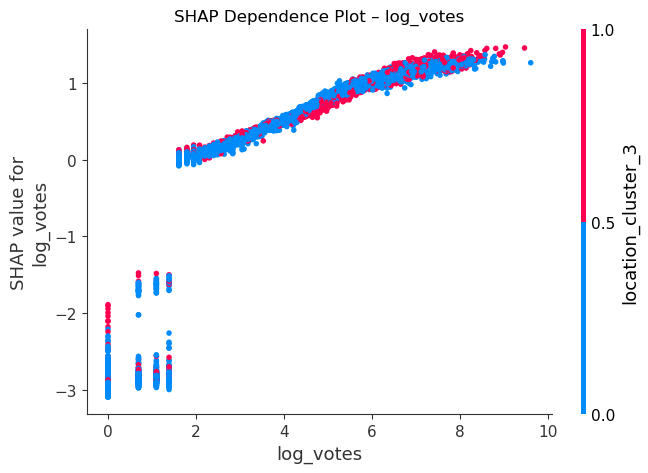

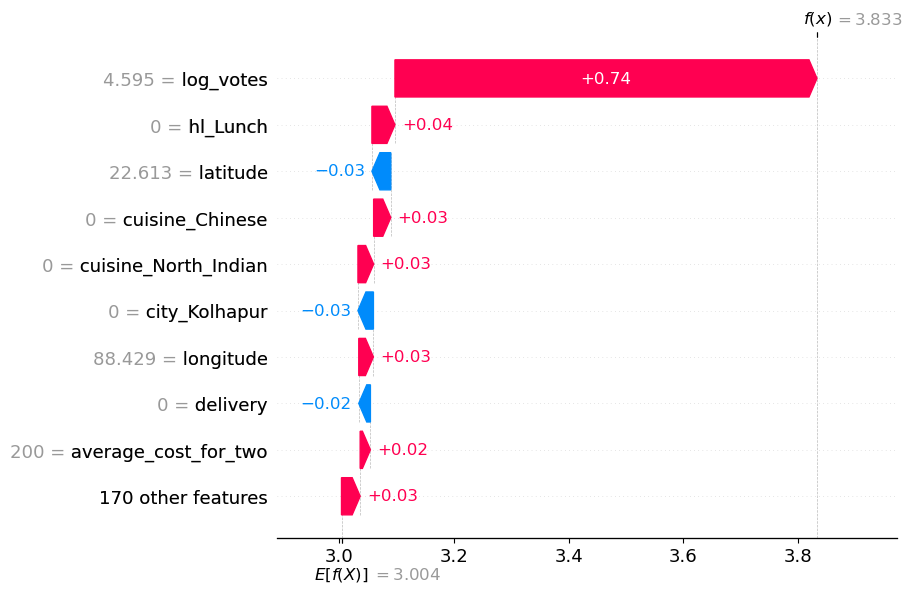

In [98]:
# =========================
# SHAP EXPLAINABILITY
# =========================

import shap
import matplotlib.pyplot as plt

# 1️⃣ Create SHAP Explainer
explainer = shap.Explainer(xgb, X_train)

# 2️⃣ Calculate SHAP values on test data
shap_values = explainer(X_test)

# 3️⃣ Global Feature Importance (Summary Plot)
shap.summary_plot(
    shap_values,
    X_test,
    show=False
)
plt.title("SHAP Summary Plot – Global Feature Impact")
plt.show()

# 4️⃣ Bar Plot (Best for PPT)
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="bar",
    show=False
)
plt.title("SHAP Feature Importance (Bar Plot)")
plt.show()

# 5️⃣ Dependence Plot for Top Feature
shap.dependence_plot(
    "log_votes",
    shap_values.values,
    X_test,
    show=False
)
plt.title("SHAP Dependence Plot – log_votes")
plt.show()

# 6️⃣ Explain One Individual Prediction
shap.plots.waterfall(shap_values[0])


## Final Model Selection

After evaluating multiple machine learning models, **XGBoost Regressor** was selected as the final model for restaurant rating prediction.

The baseline Random Forest model achieved strong performance due to effective feature engineering. However, hyperparameter tuning introduced stronger regularization, which led to slight underfitting and reduced performance.

Among all models tested, XGBoost achieved the **highest R² score (~0.939)**, demonstrating superior ability to capture complex nonlinear relationships and feature interactions. LightGBM showed comparable performance but did not outperform XGBoost.

Based on predictive accuracy, stability on unseen data, and interpretability support through SHAP, **XGBoost was finalized as the best-performing model** for this project.


## Model Interpretation Using SHAP

SHAP (SHapley Additive exPlanations) was used to interpret the predictions of the final XGBoost model at both global and local levels.

The SHAP summary plot shows that **log_votes** is the most influential feature, indicating that restaurant popularity strongly drives customer ratings. Higher values of log_votes consistently increase the predicted rating.

Geographical features such as city indicators and latitude/longitude also have a significant impact, reflecting regional dining preferences. Pricing-related features like average cost for two and price range influence customer expectations and satisfaction.

Cuisine indicators and service-related features (such as delivery, lunch availability, air conditioning, and payment options) provide incremental contributions to the prediction.

The SHAP waterfall plot explains individual predictions by showing how each feature pushes the rating above or below the average baseline value. Overall, SHAP analysis confirms that the model’s predictions align with real-world business logic and enhances model transparency and trust.


In [99]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


In [100]:
df.columns


Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [101]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

In [102]:
df2=df.copy()


In [103]:
df2.drop_duplicates(inplace=True)

In [104]:
df2.duplicated().sum()

np.int64(0)

In [105]:
df2['rating_text'].value_counts()

rating_text
Good             17569
Average          16782
Very Good        12714
Not rated        10160
Excellent         2065
Poor               590
Çok iyi             56
Sangat Baik         44
Muito Bom           43
Excelente           34
Muy Bueno           33
Bardzo dobrze       29
Bom                 26
Skvělé              24
Baik                24
Velmi dobré         22
İyi                 19
Harika              18
Ottimo              17
Veľmi dobré         16
Buono               14
Terbaik             14
Skvělá volba        13
Dobré               12
Bueno               11
Dobrze               9
Wybitnie             8
Eccellente           8
Vynikajúce           7
Průměr               6
Muito bom            5
Promedio             5
Média                5
Ortalama             3
Średnio              3
Media                3
Priemer              3
Biasa                2
Scarso               1
Name: count, dtype: int64

In [106]:
rating_map = {
    # POSITIVE
    'Excellent': 'Positive', 'Excelente': 'Positive', 'Eccellente': 'Positive',
    'Ottimo': 'Positive', 'Wybitnie': 'Positive', 'Skvělé': 'Positive',
    'Harika': 'Positive', 'Terbaik': 'Positive', 'Vynikajúce': 'Positive',
    'Muito Bom': 'Positive', 'Muito bom': 'Positive',
    'Muy Bueno': 'Positive', 'Çok iyi': 'Positive',
    'Dobré': 'Positive', 'Velmi dobré': 'Positive',
    'Bardzo dobrze': 'Positive', 'Skvělá volba': 'Positive',

    # VERY GOOD → POSITIVE
    'Very Good': 'Positive',

    # GOOD → NEUTRAL
    'Good': 'Neutral', 'Bueno': 'Neutral', 'Bom': 'Neutral',
    'Buono': 'Neutral', 'İyi': 'Neutral', 'Dobrze': 'Neutral',

    # AVERAGE → NEUTRAL
    'Average': 'Neutral', 'Media': 'Neutral', 'Média': 'Neutral',
    'Průměr': 'Neutral', 'Ortalama': 'Neutral', 'Średnio': 'Neutral',
    'Promedio': 'Neutral', 'Priemer': 'Neutral', 'Biasa': 'Neutral',

    # POOR → NEGATIVE
    'Poor': 'Negative', 'Scarso': 'Negative',

    # NOT RATED
    'Not rated': 'Unknown'
}

df2['rating_sentiment'] = df2['rating_text'].map(rating_map)


In [107]:
df2['rating_sentiment'].value_counts()

rating_sentiment
Neutral     34460
Positive    15122
Unknown     10160
Negative      591
Name: count, dtype: int64

In [108]:
df2['rating_sentiment'].isna().sum()

np.int64(84)

In [109]:
df2[df2['rating_sentiment'].isna()]['rating_text'].unique()


array(['Baik', 'Sangat Baik', 'Veľmi dobré'], dtype=object)

In [110]:
rating_map.update({
    'Baik': 'Positive',
    'Sangat Baik': 'Positive',
    'Veľmi dobré': 'Positive'
})


In [111]:
df2['rating_sentiment'] = df2['rating_text'].map(rating_map)


In [112]:
df2['rating_sentiment'].isna().sum()


np.int64(0)

In [113]:
df2['rating_sentiment'].value_counts()


rating_sentiment
Neutral     34460
Positive    15206
Unknown     10160
Negative      591
Name: count, dtype: int64

In [114]:
def rating_bucket(r):
    if r >= 4:
        return 'Positive'
    elif r >= 3:
        return 'Neutral'
    else:
        return 'Negative'

df2['rating_bucket'] = df2['aggregate_rating'].apply(rating_bucket)


In [115]:
import pandas as pd

consistency_table = pd.crosstab(
    df2['rating_sentiment'],
    df2['rating_bucket'],
    margins=True
)

consistency_table


rating_bucket,Negative,Neutral,Positive,All
rating_sentiment,,,,
Negative,591,0,0,591
Neutral,4537,29923,0,34460
Positive,0,49,15157,15206
Unknown,10160,0,0,10160
All,15288,29972,15157,60417



## 📊 Interpretation: Rating Text vs Numeric Rating Consistency

- The cross-tabulation compares normalized rating sentiment (text-based) with rating buckets derived from numeric ratings, allowing us to validate consistency between the two representations.

## 🔍 Key Observations

#### Negative sentiment shows perfect alignment:
All restaurants labeled as Negative in rating_sentiment fall into the Negative numeric rating bucket, indicating strong consistency.

#### Positive sentiment is highly reliable:
The majority of Positive rating text values align with Positive numeric ratings, with only a very small number appearing in the Neutral bucket.

#### Neutral sentiment captures mid-range ratings:
Most Neutral text labels correspond to Neutral numeric ratings, though some overlap exists with Negative ratings, reflecting subjective interpretation of average experiences.

#### ‘Unknown’ category represents unrated restaurants:
Restaurants marked as Not rated in text correctly appear without a corresponding positive or neutral numeric rating, indicating missing or unavailable rating information.

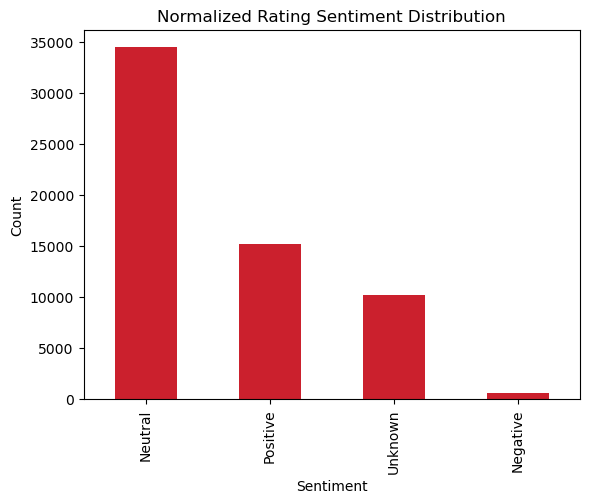

In [116]:
import matplotlib.pyplot as plt

df2['rating_sentiment'].value_counts().plot(
    kind='bar',
    color='#cb202d'
)

plt.title("Normalized Rating Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


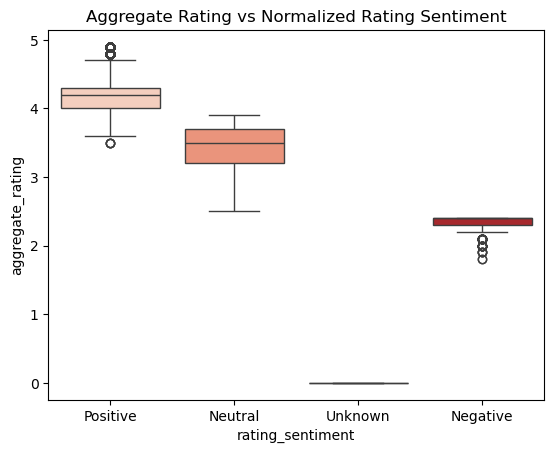

In [118]:
import seaborn as sns

sns.boxplot(
    x='rating_sentiment',
    y='aggregate_rating',
    data=df2,
    palette='Reds'
)

plt.title("Aggregate Rating vs Normalized Rating Sentiment")
plt.show()


## Handling and Interpretation of `rating_text` Column

The dataset contains a column called `rating_text`, which represents a **human-readable description of restaurant ratings** such as *Excellent, Very Good, Average, Poor*, etc.  
These values were available in **multiple languages**, as the dataset covers restaurants across different countries.

Since `rating_text` is **not raw customer review text** but a **categorical interpretation of ratings**, it was not suitable for advanced NLP techniques like word embeddings or sentiment models.

### Step 1: Normalization of Rating Text
All multilingual `rating_text` values were **manually mapped into three unified sentiment categories**:
- **Positive**
- **Neutral**
- **Negative**

An additional category **Unknown** was used for restaurants marked as *Not rated*.

This step ensured:
- Language consistency
- Simplified interpretation
- Preservation of semantic meaning

The resulting column was named **`rating_sentiment`**.

---

### Step 2: Creating Rating Buckets from Numeric Ratings
To validate the textual sentiment, the numeric target variable `aggregate_rating` was converted into rating buckets:
- Ratings < 3 → **Negative**
- Ratings between 3 and 4 → **Neutral**
- Ratings ≥ 4 → **Positive**

This derived column was named **`rating_bucket`**.

---

### Step 3: Consistency Validation
A cross-tabulation was performed between:
- `rating_sentiment` (from text)
- `rating_bucket` (from numeric rating)

The results showed strong alignment between textual labels and numeric ratings, confirming:
- High data consistency
- Reliability of the numeric rating as the modeling target
- Correct interpretation of multilingual rating text

Minor overlaps between Neutral and Negative categories reflect natural subjectivity in human-written rating descriptions.

---

### Final Decision
- `rating_text` and `rating_sentiment` were used **only for analysis and validation**
- They were **not used as model input** to avoid target leakage
- `aggregate_rating` was retained as the final target variable

This process improved data quality understanding while maintaining modeling integrity.


# CLUSTERING


## STEP 1: Prepare clustering dataset

In [125]:
from sklearn.preprocessing import StandardScaler

cluster_features = [
    'average_cost_for_two',
    'price_range',
    'log_votes',
    'latitude',
    'longitude',
    'cuisine_count',
    'delivery'
]

df_cluster = df1[cluster_features].copy()

# Scale features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)


## STEP 2: Find optimal number of clusters (Elbow Method)

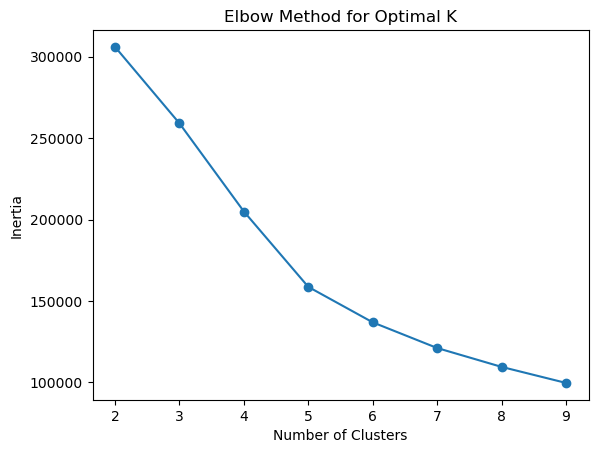

In [126]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


## KMeans Clustering

In [127]:
# Choose k (example: 4)
kmeans = KMeans(n_clusters=5, random_state=42)
df1['restaurant_cluster_kmeans'] = kmeans.fit_predict(df_cluster_scaled)


In [128]:
df1

,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,delivery,hl_Cash,hl_Takeaway_Available,hl_Indoor_Seating,hl_Dinner,hl_Lunch,hl_Credit_Card,hl_Debit_Card,hl_Delivery,hl_Air_Conditioned,hl_Digital_Payments_Accepted,hl_No_Alcohol_Available,hl_Pure_Veg,hl_Desserts_and_Bakes,hl_Breakfast,hl_Outdoor_Seating,hl_No_Seating_Available,hl_Table_booking_recommended,hl_Fullbar,hl_Free_Parking,hl_Wifi,log_votes,cuisine_count,cuisine_North_Indian,cuisine_Chinese,cuisine_Fast_Food,cuisine_Desserts,cuisine_Beverages,cuisine_South_Indian,cuisine_Continental,cuisine_Bakery,cuisine_Cafe,cuisine_Street_Food,cuisine_Italian,cuisine_Biryani,cuisine_Mithai,cuisine_Ice_Cream,cuisine_Pizza,cuisine_Mughlai,cuisine_Burger,cuisine_Sandwich,cuisine_Finger_Food,cuisine_Juices,establishment_Bar,establishment_Beverage Shop,establishment_Bhojanalya,establishment_Butcher Shop,establishment_Café,establishment_Casual Dining,establishment_Club,establishment_Cocktail Bar,establishment_Confectionery,establishment_Dessert Parlour,establishment_Dhaba,establishment_Fine Dining,establishment_Food Court,establishment_Food Truck,establishment_Irani Cafe,establishment_Kiosk,establishment_Lounge,establishment_Mess,establishment_Microbrewery,establishment_Paan Shop,establishment_Pop up,establishment_Pub,establishment_Quick Bites,establishment_Shack,establishment_Sweet Shop,establishment_Unknown,city_Ahmedabad,city_Ajmer,city_Alappuzha,city_Allahabad,city_Amravati,city_Amritsar,city_Aurangabad,city_Bangalore,city_Bhopal,city_Bhubaneshwar,city_Chandigarh,city_Chennai,city_Coimbatore,city_Cuttack,city_Darjeeling,city_Dehradun,city_Dharamshala,city_Faridabad,city_Gandhinagar,city_Gangtok,city_Ghaziabad,city_Goa,city_Gorakhpur,city_Greater Noida,city_Guntur,city_Gurgaon,city_Guwahati,city_Gwalior,city_Haridwar,city_Howrah,city_Hyderabad,city_Indore,city_Jabalpur,city_Jaipur,city_Jalandhar,city_Jammu,city_Jamnagar,city_Jamshedpur,city_Jhansi,city_Jodhpur,city_Junagadh,city_Kanpur,city_Kharagpur,city_Kochi,city_Kolhapur,city_Kolkata,city_Kota,city_Lucknow,city_Ludhiana,city_Madurai,city_Manali,city_Mangalore,city_Manipal,city_Meerut,city_Mohali,city_Mumbai,city_Mussoorie,city_Mysore,city_Nagpur,city_Nainital,city_Nashik,city_Navi Mumbai,city_Nayagaon,city_Neemrana,city_New Delhi,city_Noida,city_Ooty,city_Palakkad,city_Panchkula,city_Patiala,city_Patna,city_Puducherry,city_Pune,city_Pushkar,city_Raipur,city_Rajkot,city_Ranchi,city_Rishikesh,city_Salem,city_Secunderabad,city_Shimla,city_Siliguri,city_Srinagar,city_Surat,city_Thane,city_Thrissur,city_Tirupati,city_Trichy,city_Trivandrum,city_Udaipur,city_Udupi,city_Vadodara,city_Varanasi,city_Vellore,city_Vijayawada,city_Vizag,city_Zirakpur,location_cluster_1,location_cluster_2,location_cluster_3,location_cluster_4,location_cluster_5,location_cluster_6,location_cluster_7,location_cluster_8,location_cluster_9,restaurant_cluster_kmeans
77763,17.405883,78.498838,750,2,4.5,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,10.658200,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
19931,12.912934,77.682906,1600,3,4.9,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,9.850509,6,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19648,12.978888,77.640922,1000,3,4.6,0,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,9.661798,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

##  Understand KMeans clusters

In [130]:
df1.groupby('restaurant_cluster_kmeans')[cluster_features].mean()


,average_cost_for_two,price_range,log_votes,latitude,longitude,cuisine_count,delivery
restaurant_cluster_kmeans,,,,,,,
0,1325.247994,3.033457,5.199928,21.052431,77.413560,3.301380,0.14555
1,297.211689,1.324555,2.752713,21.673757,77.932496,1.787295,0.00000
2,381.537079,1.479289,4.017456,22.011424,77.960533,2.319615,1.00000
3,600.000000,2.000000,2.302585,10000.000000,0.000000,4.000000,0.00000
4,479.082809,1.758910,1.519296,0.154544,0.000000,1.952830,0.00000


## 🧩 Cluster-wise Interpretation
- 🔹 Cluster 0 – Premium & Popular Restaurants

Highest average cost for two (~₹1325)

High price range (~3)

Very high popularity (log_votes ≈ 5.2)

More cuisines offered (~3.3)

Some delivery availability

#### 📌 Interpretation:
These are premium, popular restaurants with diverse menus, usually preferred for dine-in experiences and special occasions.

- 🔹 Cluster 1 – Low-cost, Low-engagement Restaurants

Lowest cost (~₹297)

Lowest price range

Low popularity (log_votes ≈ 2.75)

Few cuisines

No delivery

#### 📌 Interpretation:
These are budget local eateries with limited offerings and low customer engagement, often small or neighborhood-based.

- 🔹 Cluster 2 – Budget but Highly Popular (Delivery-focused)

Low cost (~₹381)

Low price range

High popularity (log_votes ≈ 4.0)

Delivery available for all

#### 📌 Interpretation:
These are value-for-money restaurants that are very popular online, likely driven by delivery platforms and repeat orders.

- 🔹 Cluster 3 – Data Anomaly / Invalid Location Cluster

Unrealistic latitude (10000) & longitude (0)

Fixed values across features

#### 📌 Interpretation:
This cluster likely represents data errors or placeholder location values and should not be used for business interpretation.

⚠️ Action:
Exclude this cluster from analysis or treat it as an outlier group.

- 🔹 Cluster 4 – Moderate Cost, Low Popularity Restaurants

Mid-level cost (~₹479)

Low popularity (log_votes ≈ 1.5)

Limited cuisines

No delivery

#### 📌 Interpretation:
These are mid-priced restaurants with limited reach and engagement, possibly dine-in focused but not very popular online.

🧠 Overall Business Insight

Restaurants naturally segment into budget, popular delivery-driven, and premium dine-in categories.

Popularity (votes) and cost are the strongest differentiators between clusters.

Delivery availability strongly influences customer engagement.

Clustering helps platforms target promotions, pricing strategies, and recommendations more effectively.

### Interpretation of KMeans Restaurant Clusters

Cluster analysis reveals five distinct restaurant segments.  
Cluster 0 represents premium and highly popular restaurants with high costs, diverse cuisines, and strong customer engagement.  
Cluster 1 consists of low-cost local eateries with minimal popularity and limited offerings.  
Cluster 2 captures budget restaurants that are highly popular, primarily driven by delivery services and online orders.  
Cluster 3 appears to be an anomaly due to invalid geographic values and was excluded from business interpretation.  
Cluster 4 includes moderately priced restaurants with low engagement and limited service availability.

Overall, the clustering highlights how cost, popularity, cuisine diversity, and delivery availability play a key role in differentiating restaurant types.
